# Exploratory Data Analysis (EDA)

## Table of Contents
1. [Dataset Overview](#dataset-overview)
2. [Handling Missing Values](#handling-missing-values)
3. [Feature Distributions](#feature-distributions)
4. [Possible Biases](#possible-biases)
5. [Correlations](#correlations)


. [Correlations](#correlations)


In [49]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Dataset Overview

[Provide a high-level overview of the dataset. This should include the source of the dataset, the number of samples, the number of features, and example showing the structure of the dataset.]


In [50]:
### Biovolume_per_site_class_and_depth.pkl - Contains biovolume data for each Profile_id and depth, separated into log-spaced size classes
#       - Column names indicate size classes from 0.2 to ~10 mm equivalent spherical diameter (ESD)
#       - Biovolume in mm³ per liter seawater
#       - Profile_id is always a string
#       - depth in dbar (approximately equal to depth in meters) starts at 12.5 dbar and increases in 25 dbar steps to 987.5 dbar (40 depth levels)
#       - depth_bin = integer from 0 to 39, indicating the depth level (0 = 12.5 dbar, 1 = 37.5 dbar, ..., 39 = 987.5 dbar)

BV_data = pd.read_pickle('../Data/Biovolume_per_size_class_and_depth.pkl')
BV_data.info()
BV_data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 20 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   Profile_id                             224520 non-null  object 
 1   depth                                  224520 non-null  float64
 2   depth_bin                              224520 non-null  int64  
 3   Biovolume [ppm] (ESD: 0.203-0.256 mm)  224520 non-null  float64
 4   Biovolume [ppm] (ESD: 0.256-0.323 mm)  224520 non-null  float64
 5   Biovolume [ppm] (ESD: 0.323-0.406 mm)  224520 non-null  float64
 6   Biovolume [ppm] (ESD: 0.406-0.512 mm)  224520 non-null  float64
 7   Biovolume [ppm] (ESD: 0.512-0.645 mm)  224520 non-null  float64
 8   Biovolume [ppm] (ESD: 0.645-0.813 mm)  224520 non-null  float64
 9   Biovolume [ppm] (ESD: 0.813-1.02 mm)   224520 non-null  float64
 10  Biovolume [ppm] (ESD: 1.02-1.29 mm)    224520 non-null  

Profile_id  depth  depth_bin  \
0  0000a_WMO5906623_recovery_profiles   12.5          0   
1  0000a_WMO5906623_recovery_profiles   37.5          1   
2  0000a_WMO5906623_recovery_profiles   62.5          2   
3  0000a_WMO5906623_recovery_profiles   87.5          3   
4  0000a_WMO5906623_recovery_profiles  112.5          4   

   Biovolume [ppm] (ESD: 0.203-0.256 mm)  \
0                               0.114562   
1                               0.136750   
2                               0.127222   
3                               0.175240   
4                               0.126923   

   Biovolume [ppm] (ESD: 0.256-0.323 mm)  \
0                               0.104158   
1                               0.117453   
2                               0.118740   
3                               0.167346   
4                               0.157563   

   Biovolume [ppm] (ESD: 0.323-0.406 mm)  \
0                               0.078780   
1                               0.113992   
2                               0.134736   
3                               0.235771   
4                               0.205987   

   Biovolume [ppm] (ESD: 0.406-0.512 mm)  \
0                               0.066139   
1                               0.117148   
2                               0.156787   
3                               0.252304   
4                               0.263124   

   Biovolume [ppm] (ESD: 0.512-0.645 mm)  \
0                               0.081787   
1                               0.142345   
2                               0.177491   
3                               0.290185   
4                               0.378548   

   Biovolume [ppm] (ESD: 0.645-0.813 mm)  \
0                               0.062770   
1                               0.118748   
2                               0.146157   
3                               0.307278   
4                               0.511686   

   Biovolume [ppm] (ESD: 0.813-1.02 mm)  Biovolume [ppm] (ESD: 1.02-1.29 mm)  \
0                              0.122905                             0.036882   
1                              0.115595                             0.203758   
2                              0.145280                             0.131664   
3                              0.273936                             0.196201   
4                              0.522228                             0.528398   

   Biovolume [ppm] (ESD: 1.29-1.63 mm)  Biovolume [ppm] (ESD: 1.63-2.05 mm)  \
0                             0.019573                             0.000000   
1                             0.142237                             0.047568   
2                             0.024792                             0.000000   
3                             0.248322                             0.143855   
4                             0.478425                             0.595710   

   Biovolume [ppm] (ESD: 2.05-2.58 mm)  Biovolume [ppm] (ESD: 2.58-3.25 mm)  \
0                             0.000000                                  0.0   
1                             0.000000                                  0.0   
2                             0.197754                                  0.0   
3                             0.000000                                  0.0   
4                             0.245062                                  0.0   

   Biovolume [ppm] (ESD: 3.25-4.1 mm)  Biovolume [ppm] (ESD: 4.1-5.16 mm)  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   Biovolume [ppm] (ESD: 5.16-6.5 mm)  Biovolume [ppm] (ESD: 6.5-8.19 mm)  \
0                                 0.0                                 0.0   
1                                 

In [51]:
### Environmental_data_depth_resolved.pkl - Contains metadata for every Profile_id and depth: 
#       - Latitude, Longitude & datetime (identical for all depths of one Profile_id)
#       - 10 environmental variables from CopernicusMarine Services, interpolated to the sampling locations, times and depths
#       - distance_to_coast_km (calculated from Latitude & Longitude)
#       - MarineRegion (categorical variable, from MarineRegions shapefile)

env_data = pd.read_pickle('../Data/Environmental_data_depth_resolved.pkl')
# subset env_data to only contain Profile_ids present in BV_data
env_data_subset = env_data[env_data['Profile_id'].isin(BV_data['Profile_id'])]
env_data_subset.info()
env_data.info()
# save subsetted env_data for future use
env_data_subset.to_pickle('../Data/Environmental_data_depth_resolved_subset.pkl')

<class 'pandas.core.frame.DataFrame'>
Index: 224520 entries, 0 to 227839
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Profile_id            224520 non-null  object        
 1   Latitude              224520 non-null  float64       
 2   Longitude             224520 non-null  float64       
 3   datetime              224520 non-null  datetime64[ns]
 4   depth                 224520 non-null  float64       
 5   ph                    224520 non-null  float64       
 6   chl                   224520 non-null  float64       
 7   no3                   224520 non-null  float64       
 8   po4                   224520 non-null  float64       
 9   si                    224520 non-null  float64       
 10  o2                    224520 non-null  float64       
 11  fe                    224520 non-null  float64       
 12  phyc                  224520 non-null  float64       
 13  thet

In [52]:
# Profile_id_to_clusters.pkl - Contains mapping of Profile_id to cluster labels (KMeans clustering based on vertical patterns of environmental variables)
#        - total of 10 clusters with unequal number of Profile_ids in each cluster
cluster_mapping = pd.read_pickle('../Data/Profile_id_to_clusters.pkl')
cluster_mapping.info()
cluster_mapping.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5613 entries, 0 to 5612
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Profile_id  5613 non-null   object
 1   cluster     5613 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 65.9+ KB


Profile_id  cluster
0       s033        8
1       s035        8
2       s034        8
3       s036        8
4       s037        3

In [53]:
import pandas as pd

# Number of samples = number of unique Profile_ids
num_samples = BV_data["Profile_id"].nunique()

# Number of features = 17 size classes x 40 depth levels per Profile_id
num_features = (BV_data.shape[1] - 3) * 40  # subtracting 3 for Profile_id and depth columns

# Display these dataset characteristics
print(f"Number of samples: {num_samples}")
print(f"Number of features: {num_features}")

# Display the first few rows of the dataframe to show the structure
print("Example data:")
BV_data.head()


Number of samples: 5613
Number of features: 680
Example data:


Profile_id  depth  depth_bin  \
0  0000a_WMO5906623_recovery_profiles   12.5          0   
1  0000a_WMO5906623_recovery_profiles   37.5          1   
2  0000a_WMO5906623_recovery_profiles   62.5          2   
3  0000a_WMO5906623_recovery_profiles   87.5          3   
4  0000a_WMO5906623_recovery_profiles  112.5          4   

   Biovolume [ppm] (ESD: 0.203-0.256 mm)  \
0                               0.114562   
1                               0.136750   
2                               0.127222   
3                               0.175240   
4                               0.126923   

   Biovolume [ppm] (ESD: 0.256-0.323 mm)  \
0                               0.104158   
1                               0.117453   
2                               0.118740   
3                               0.167346   
4                               0.157563   

   Biovolume [ppm] (ESD: 0.323-0.406 mm)  \
0                               0.078780   
1                               0.113992   
2                               0.134736   
3                               0.235771   
4                               0.205987   

   Biovolume [ppm] (ESD: 0.406-0.512 mm)  \
0                               0.066139   
1                               0.117148   
2                               0.156787   
3                               0.252304   
4                               0.263124   

   Biovolume [ppm] (ESD: 0.512-0.645 mm)  \
0                               0.081787   
1                               0.142345   
2                               0.177491   
3                               0.290185   
4                               0.378548   

   Biovolume [ppm] (ESD: 0.645-0.813 mm)  \
0                               0.062770   
1                               0.118748   
2                               0.146157   
3                               0.307278   
4                               0.511686   

   Biovolume [ppm] (ESD: 0.813-1.02 mm)  Biovolume [ppm] (ESD: 1.02-1.29 mm)  \
0                              0.122905                             0.036882   
1                              0.115595                             0.203758   
2                              0.145280                             0.131664   
3                              0.273936                             0.196201   
4                              0.522228                             0.528398   

   Biovolume [ppm] (ESD: 1.29-1.63 mm)  Biovolume [ppm] (ESD: 1.63-2.05 mm)  \
0                             0.019573                             0.000000   
1                             0.142237                             0.047568   
2                             0.024792                             0.000000   
3                             0.248322                             0.143855   
4                             0.478425                             0.595710   

   Biovolume [ppm] (ESD: 2.05-2.58 mm)  Biovolume [ppm] (ESD: 2.58-3.25 mm)  \
0                             0.000000                                  0.0   
1                             0.000000                                  0.0   
2                             0.197754                                  0.0   
3                             0.000000                                  0.0   
4                             0.245062                                  0.0   

   Biovolume [ppm] (ESD: 3.25-4.1 mm)  Biovolume [ppm] (ESD: 4.1-5.16 mm)  \
0                                 0.0                                 0.0   
1                                 0.0                                 0.0   
2                                 0.0                                 0.0   
3                                 0.0                                 0.0   
4                                 0.0                                 0.0   

   Biovolume [ppm] (ESD: 5.16-6.5 mm)  Biovolume [ppm] (ESD: 6.5-8.19 mm)  \
0                                 0.0                                 0.0   
1                                 

## Handling Missing Values

[Identify any missing values in the dataset, and describe your approach to handle them if there are any. If there are no missing values simply indicate that there are none.]


In [54]:
# Check for missing values
missing_values = BV_data.isnull().sum()
print(missing_values)
## --> There are no missing data in our dataset


Profile_id                               0
depth                                    0
depth_bin                                0
Biovolume [ppm] (ESD: 0.203-0.256 mm)    0
Biovolume [ppm] (ESD: 0.256-0.323 mm)    0
Biovolume [ppm] (ESD: 0.323-0.406 mm)    0
Biovolume [ppm] (ESD: 0.406-0.512 mm)    0
Biovolume [ppm] (ESD: 0.512-0.645 mm)    0
Biovolume [ppm] (ESD: 0.645-0.813 mm)    0
Biovolume [ppm] (ESD: 0.813-1.02 mm)     0
Biovolume [ppm] (ESD: 1.02-1.29 mm)      0
Biovolume [ppm] (ESD: 1.29-1.63 mm)      0
Biovolume [ppm] (ESD: 1.63-2.05 mm)      0
Biovolume [ppm] (ESD: 2.05-2.58 mm)      0
Biovolume [ppm] (ESD: 2.58-3.25 mm)      0
Biovolume [ppm] (ESD: 3.25-4.1 mm)       0
Biovolume [ppm] (ESD: 4.1-5.16 mm)       0
Biovolume [ppm] (ESD: 5.16-6.5 mm)       0
Biovolume [ppm] (ESD: 6.5-8.19 mm)       0
Biovolume [ppm] (ESD: 8.19-10.3 mm)      0
dtype: int64


In [55]:
# Handling missing values
# Example: Replacing NaN values with the mean value of the column
# df.fillna(df.mean(), inplace=True)

# Your code for handling missing values goes here


## Feature Distributions

[Plot the distribution of various features and target variables. Comment on the skewness, outliers, or any other observations.]


In [56]:
# Example: Plotting histograms of all numerical features
#df.hist(figsize=(12, 12))
#plt.show()


### Testing Distribution of Raw Data (Features)


Result -->
All classes are extremely skewed to the right (skewness 8–55!).
Raw data is completely unsuitable for normal distribution.
Log transformation clearly improves the distribution.
However, log normality is not perfect (due to huge n).
The following applies to ALL classes: “mixed/unclear (log helps).



In [57]:

from scipy import stats

# 0) Explicitly use BV_data as the source DataFrame
df = BV_data.copy()
if df is None or df.empty:
    raise ValueError("BV_data is not loaded or is empty. Load BV_data first.")

# 1) Select biovolume columns
biovolume_cols = [col for col in df.columns if "Biovolume [ppm]" in col]

print(f"Found {len(biovolume_cols)} biovolume columns:")
for c in biovolume_cols:
    print("  -", c)


def analyze_lognormality_with_report(df, cols, sample_size=5000):
    results = []

    for col in cols:
        x = df[col].values
        x_pos = x[x > 0]

        if len(x_pos) < 50:
            print(f"\n[INFO] Skipping column '{col}': too few positive values ({len(x_pos)}).")
            continue

        # Subsample for Shapiro-Wilk
        sample_raw = np.random.choice(x[~np.isnan(x)],
                                      size=min(sample_size, len(x)),
                                      replace=False)
        sample_log = np.random.choice(x_pos,
                                      size=min(sample_size, len(x_pos)),
                                      replace=False)

        skew_raw = stats.skew(sample_raw)
        mean_raw = np.mean(sample_raw)
        median_raw = np.median(sample_raw)

        p_raw = stats.shapiro(sample_raw).pvalue if 3 <= len(sample_raw) <= 5000 else np.nan
        p_log = stats.shapiro(np.log(sample_log)).pvalue if 3 <= len(sample_log) <= 5000 else np.nan

        if np.isnan(p_raw) or np.isnan(p_log):
            classification = "undetermined"
            interp = "The sample size is too large or too small for Shapiro-Wilk."
        else:
            if p_raw < 0.05 and p_log > 0.05:
                classification = "lognormal-like"
                interp = (
                    "Raw values strongly deviate from normality, but log-transformed values "
                    "are compatible with a normal distribution. Geometric means and "
                    "log-space CIs are appropriate."
                )
            elif p_raw < 0.05 and p_log < 0.05 and p_log > p_raw:
                classification = "mixed/unclear (log helps)"
                interp = (
                    "Both raw and log-transformed data deviate from perfect normality, "
                    "but the log-transform clearly improves symmetry. Typical for heavily "
                    "right-skewed ecological data."
                )
            elif p_raw > 0.05:
                classification = "normal-like (raw)"
                interp = (
                    "Raw data are roughly compatible with a normal distribution. "
                    "Arithmetic means and symmetric CIs are acceptable."
                )
            else:
                classification = "mixed/unclear"
                interp = (
                    "Neither raw nor log-transformed values are close to normal. "
                    "Consider median- or bootstrap-based statistics."
                )

        results.append({
            "column": col,
            "n_total": len(x),
            "n_positive": len(x_pos),
            "mean_raw": mean_raw,
            "median_raw": median_raw,
            "skew_raw": skew_raw,
            "p_raw_Shapiro": p_raw,
            "p_log_Shapiro": p_log,
            "classification": classification
        })

        print("\n" + "=" * 90)
        print(f"{col}".upper())
        print("=" * 90)
        print(f"  Total observations       : {len(x)}")
        print(f"  Positive values (>0)     : {len(x_pos)}")
        print(f"  Mean (raw)               : {mean_raw:.4e}")
        print(f"  Median (raw)             : {median_raw:.4e}")
        print(f"  Skewness (raw)           : {skew_raw:.3f}")
        print(f"  Shapiro p-value (raw)    : {p_raw:.3e}")
        print(f"  Shapiro p-value (log)    : {p_log:.3e}")
        print(f"  Classification           : {classification}")
        print("\nInterpretation:")
        print(f"  {interp}")
        print("-" * 90)

    return pd.DataFrame(results)


summary_df = analyze_lognormality_with_report(df, biovolume_cols, sample_size=5000)

print("\n\n=== SUMMARY TABLE (one row per size class) ===")
print(summary_df.to_string(index=False))


Found 17 biovolume columns:
  - Biovolume [ppm] (ESD: 0.203-0.256 mm)
  - Biovolume [ppm] (ESD: 0.256-0.323 mm)
  - Biovolume [ppm] (ESD: 0.323-0.406 mm)
  - Biovolume [ppm] (ESD: 0.406-0.512 mm)
  - Biovolume [ppm] (ESD: 0.512-0.645 mm)
  - Biovolume [ppm] (ESD: 0.645-0.813 mm)
  - Biovolume [ppm] (ESD: 0.813-1.02 mm)
  - Biovolume [ppm] (ESD: 1.02-1.29 mm)
  - Biovolume [ppm] (ESD: 1.29-1.63 mm)
  - Biovolume [ppm] (ESD: 1.63-2.05 mm)
  - Biovolume [ppm] (ESD: 2.05-2.58 mm)
  - Biovolume [ppm] (ESD: 2.58-3.25 mm)
  - Biovolume [ppm] (ESD: 3.25-4.1 mm)
  - Biovolume [ppm] (ESD: 4.1-5.16 mm)
  - Biovolume [ppm] (ESD: 5.16-6.5 mm)
  - Biovolume [ppm] (ESD: 6.5-8.19 mm)
  - Biovolume [ppm] (ESD: 8.19-10.3 mm)

BIOVOLUME [PPM] (ESD: 0.203-0.256 MM)
  Total observations       : 224520
  Positive values (>0)     : 222236
  Mean (raw)               : 2.3122e-02
  Median (raw)             : 1.3271e-02
  Skewness (raw)           : 29.201
  Shapiro p-value (raw)    : 2.059e-93
  Shapiro p-value

### Geometric mean biovolume per size class with 95% confidence intervals

The biovolume data show strong right-skewness in all size classes (skewness 8–55) and clear deviations from normality (Shapiro p << 0.001). After log-transformation, the distributions become substantially more symmetric and closer to normal, making statistical analysis in log-space appropriate and robust.

Therefore, geometric means are calculated for each size class (exp(mean(log(x)))), and 95% confidence intervals are computed in log-space and back-transformed to the original scale. The resulting confidence intervals are asymmetric, which correctly reflects the underlying data structure. A logarithmic y-axis is used because biovolume values span multiple orders of magnitude.


Result -->
The geometric mean biovolume increases systematically with particle size class, spanning more than one order of magnitude from the smallest to the largest ESD bins. This pattern reflects the expected scaling of particle or organismal biovolume with size. Confidence intervals are asymmetric and narrow for most classes, which is typical for log-normally distributed data with large sample sizes. Larger size classes show wider CIs due to fewer observations, increased variability, and a stronger influence of occasional large particles. Overall, the log-scale representation and geometric means reveal a consistent and well-structured size–biovolume relationship across all classes.

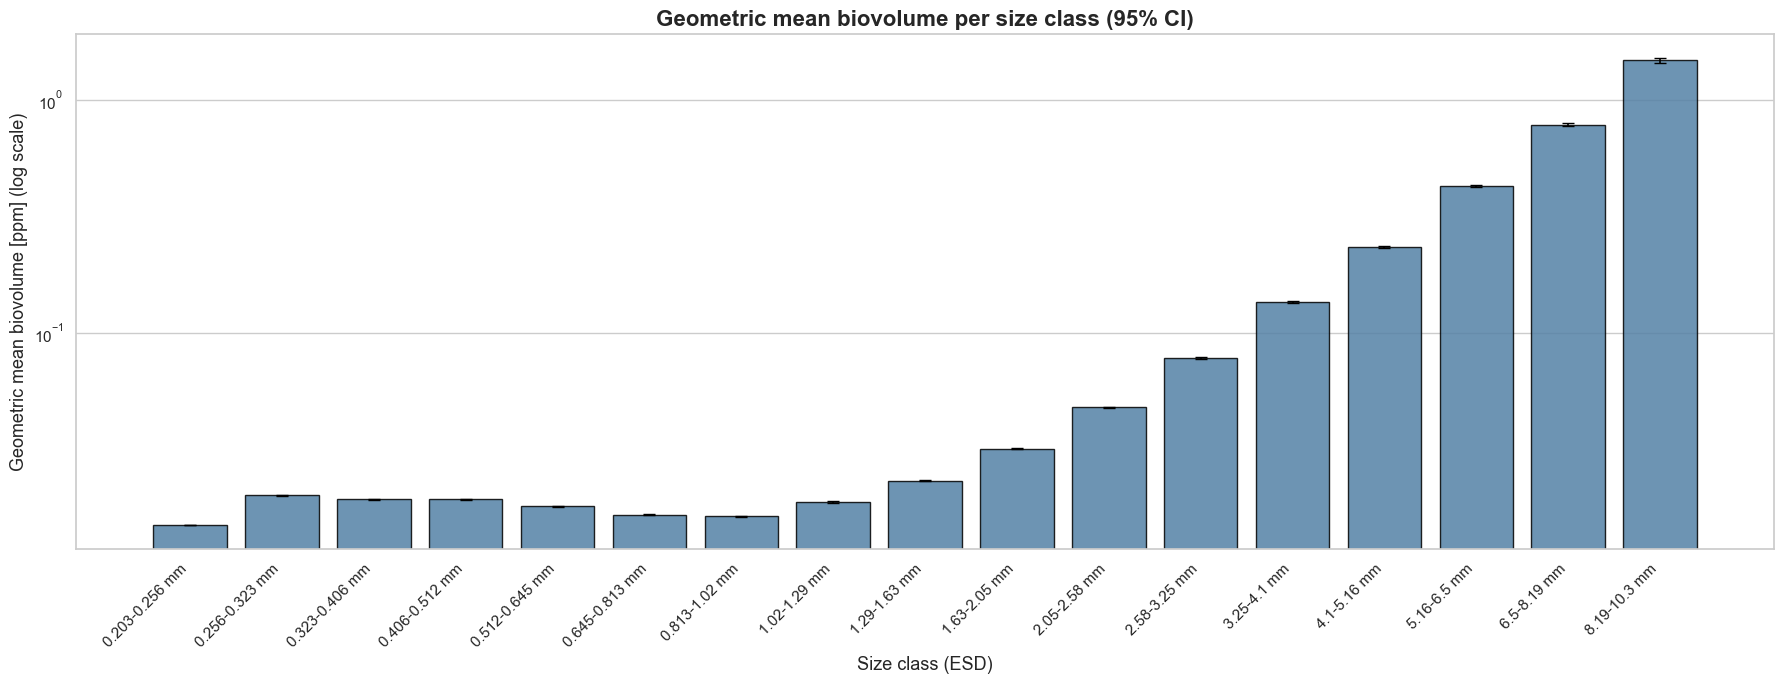

In [58]:
# Import necessary libraries
import re
from matplotlib.ticker import LogFormatterSciNotation

# Select biovolume columns
biovolume_cols = [col for col in BV_data.columns if "Biovolume [ppm]" in col]

# Positive values only
bv = BV_data[biovolume_cols]
bv_pos = bv.where(bv > 0)
log_data = np.log(bv_pos)

# Geometric mean = exp(mean(log(x)))
mean_log = log_data.mean()
std_log = log_data.std()
n = log_data.count()

# 95% CI in log-space
t_crit = stats.t.ppf(0.975, df=n - 1)
ci_half_width_log = t_crit * (std_log / np.sqrt(n))

ci_low = np.exp(mean_log - ci_half_width_log)
ci_high = np.exp(mean_log + ci_half_width_log)

geo_mean = np.exp(mean_log)

err_lower = geo_mean - ci_low
err_upper = ci_high - geo_mean

# Extract ESD labels
size_classes = []
for col in biovolume_cols:
    m = re.search(r"\(ESD: *([^)]+)\)", col)
    size_classes.append(m.group(1).strip() if m else col)

# Build plot dataframe
plot_df = pd.DataFrame({
    "Size class (ESD)": size_classes,
    "Geo mean biovolume [ppm]": geo_mean.values,
    "err_lower": err_lower.values,
    "err_upper": err_upper.values
})

# PLOT
sns.set(style="whitegrid")
plt.figure(figsize=(18, 7))

ax = sns.barplot(
    data=plot_df,
    x="Size class (ESD)",
    y="Geo mean biovolume [ppm]",
    color="steelblue",
    edgecolor="black",
    alpha=0.85,
    errorbar=None
)

# Asymmetric CI
yerr = np.vstack([plot_df.err_lower, plot_df.err_upper])
plt.errorbar(
    x=np.arange(len(plot_df)),
    y=plot_df["Geo mean biovolume [ppm]"],
    yerr=yerr,
    fmt="none",
    ecolor="black",
    capsize=4,
    linewidth=1.2
)

ax.set_yscale("log")
ax.yaxis.set_major_formatter(LogFormatterSciNotation())

ax.set_xlabel("Size class (ESD)", fontsize=13)
ax.set_ylabel("Geometric mean biovolume [ppm] (log scale)", fontsize=13)
ax.set_title("Geometric mean biovolume per size class (95% CI)", fontsize=16, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


### Geometric mean total biovolume per depth bin (95% CI)

This analysis aggregates biovolume across all ESD size classes within each depth bin, producing a depth-resolved measure of total biovolume. Because the distribution is strongly right-skewed, geometric means and asymmetric 95% confidence intervals are computed in log-space, similar to the size-class analysis.


Result -->
The geometric mean of total biovolume is highest in the shallowest depth bins (0–2) and then declines steeply with depth, leveling off from roughly bin 8 onwards. This indicates a strong concentration of particulate/organismal biovolume in the upper water column, consistent with surface‐driven production and decreasing biomass with depth. The 95% confidence intervals are relatively narrow across bins, suggesting that the vertical pattern is robust despite variability among profiles.

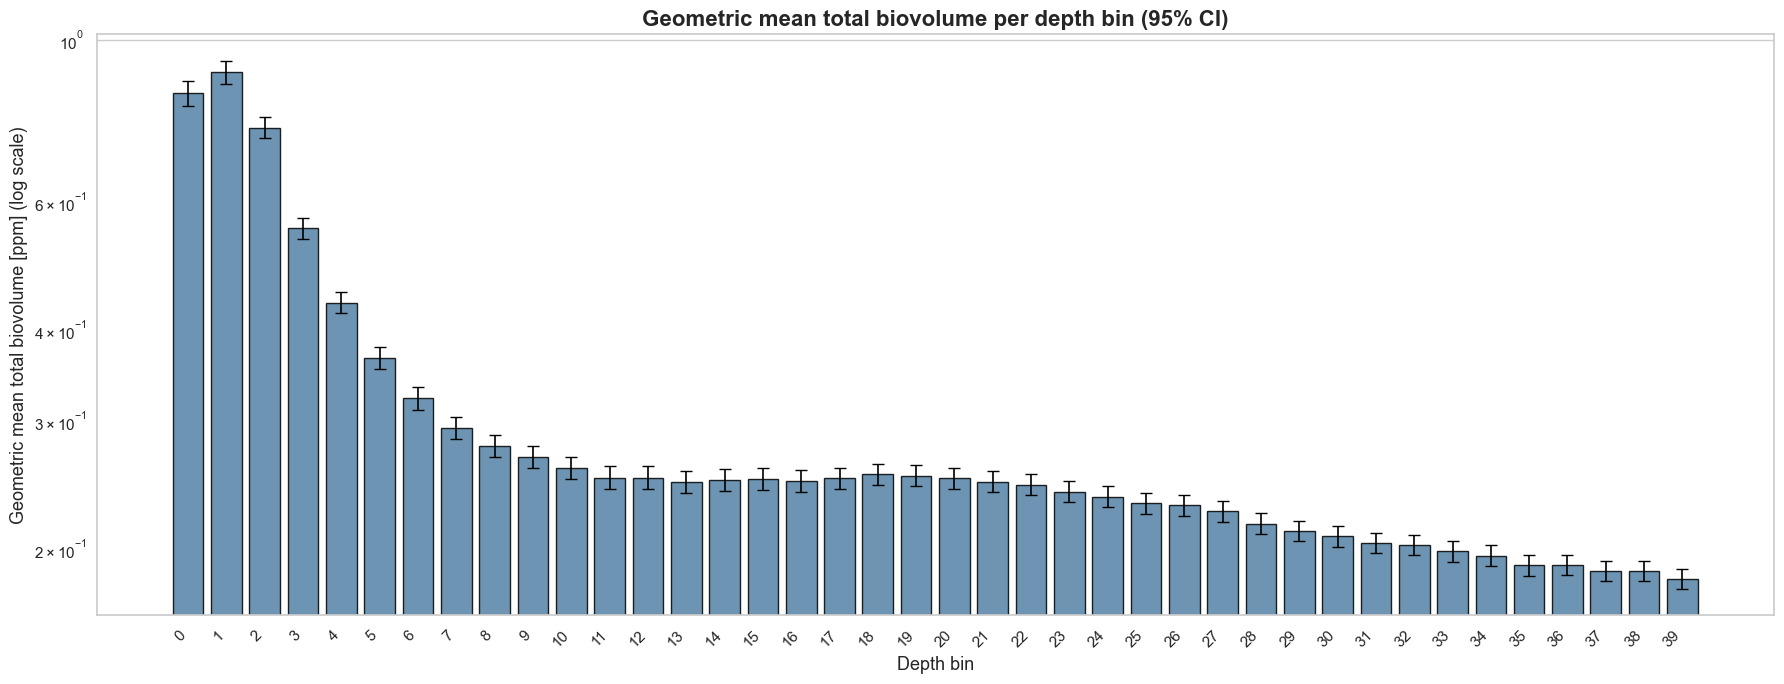

In [59]:

# --- Step 1: Select all biovolume columns ---
biovolume_cols = [col for col in BV_data.columns if "Biovolume [ppm]" in col]

# --- Step 2: Compute total biovolume per row (sum across ESD classes) ---
BV_data["total_biovolume"] = BV_data[biovolume_cols].clip(lower=0).sum(axis=1)

# --- Step 3: Group by depth_bin ---
grouped = BV_data.groupby("depth_bin")["total_biovolume"]

# --- Step 4: Safely compute log-space stats per group ---
# For each depth_bin, compute mean(log(x)), std(log(x)) and n = count(x>0).
# Use these to build CI in log-space. Handle groups with n <= 1 to avoid len(float) errors.
def group_log_stats(s):
    pos = s[s > 0].astype(float)
    npos = pos.size
    if npos == 0:
        return pd.Series({"mean_log": np.nan, "std_log": np.nan, "n": 0})
    logv = np.log(pos)
    # use sample std (ddof=1) if possible, otherwise 0.0
    std = logv.std(ddof=1) if npos > 1 else 0.0
    return pd.Series({"mean_log": logv.mean(), "std_log": std, "n": int(npos)})

agg = grouped.apply(group_log_stats)

# Ensure agg is a DataFrame with columns 'mean_log', 'std_log', 'n'.
# Depending on pandas version/shape, apply() can return a Series with a multi-index;
# normalize that into a clean DataFrame so accessing agg["n"] won't raise KeyError.
if isinstance(agg, pd.Series):
    agg = agg.unstack()
if isinstance(agg, pd.DataFrame) and agg.columns.nlevels > 1:
    # collapse multi-level column names if present
    agg.columns = [c[-1] if isinstance(c, tuple) else c for c in agg.columns]
# ensure 'n' exists and is integer-like
if "n" in agg.columns:
    try:
        agg["n"] = agg["n"].astype(int)
    except Exception:
        # fallback: coerce to numeric then to int, filling NaN with 0
        agg["n"] = pd.to_numeric(agg["n"], errors="coerce").fillna(0).astype(int)

# If no positive values in a group, leave NaNs and zeros; avoid invalid df for t.ppf
df_n = agg["n"]
df_df = df_n - 1  # degrees of freedom

# t critical values (will produce nan where df <= 0)
t_crit = stats.t.ppf(0.975, df=df_df)

# compute CI half width in log-space, set to 0 where std or n are not valid
with np.errstate(invalid="ignore", divide="ignore"):
    ci_half_width_log = t_crit * (agg["std_log"] / np.sqrt(agg["n"]))
ci_half_width_log = ci_half_width_log.fillna(0.0)

# compute CI bounds and geometric mean (back-transform)
mean_log = agg["mean_log"]
ci_low  = np.exp(mean_log - ci_half_width_log)
ci_high = np.exp(mean_log + ci_half_width_log)
geo_mean = np.exp(mean_log)

err_lower = geo_mean - ci_low
err_upper = ci_high - geo_mean

# --- Step 5: Build plotting dataframe ---
plot_df = pd.DataFrame({
    "depth_bin": agg.index.astype(int),
    "geo_mean": geo_mean.values,
    "err_lower": err_lower.values,
    "err_upper": err_upper.values
}).reset_index(drop=True)

# --- Step 6: Plot ---
sns.set(style="whitegrid")
plt.figure(figsize=(18, 7))

ax = sns.barplot(
    data=plot_df,
    x="depth_bin",
    y="geo_mean",
    color="steelblue",
    edgecolor="black",
    alpha=0.85,
    errorbar=None
)

# Asymmetric CI
yerr = np.vstack([plot_df["err_lower"], plot_df["err_upper"]])
plt.errorbar(
    x=np.arange(len(plot_df)),
    y=plot_df["geo_mean"],
    yerr=yerr,
    fmt="none",
    ecolor="black",
    capsize=4,
    linewidth=1.2
)

# Log y-scale
ax.set_yscale("log")
ax.yaxis.set_major_formatter(LogFormatterSciNotation())

ax.set_xlabel("Depth bin", fontsize=13)
ax.set_ylabel("Geometric mean total biovolume [ppm] (log scale)", fontsize=13)
ax.set_title("Geometric mean total biovolume per depth bin (95% CI)", fontsize=16, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



#### Heatmap: Total biovolume per depth bin and size class

Result -->

The heatmap shows that total biovolume is strongly concentrated in the upper depth bins, with maximum values occurring in the top 0–3 bins. Biovolume decreases rapidly with depth, stabilizing at much lower levels below roughly bin 10. Across depth, smaller size classes dominate the biovolume signal, while larger particles contribute increasingly at shallower depths but become scarce with depth. This pattern reflects typical vertical structuring in particle or plankton communities, where production and larger particle abundance are highest near the surface and decline with depth due to sinking, remineralization, and reduced biological activity.

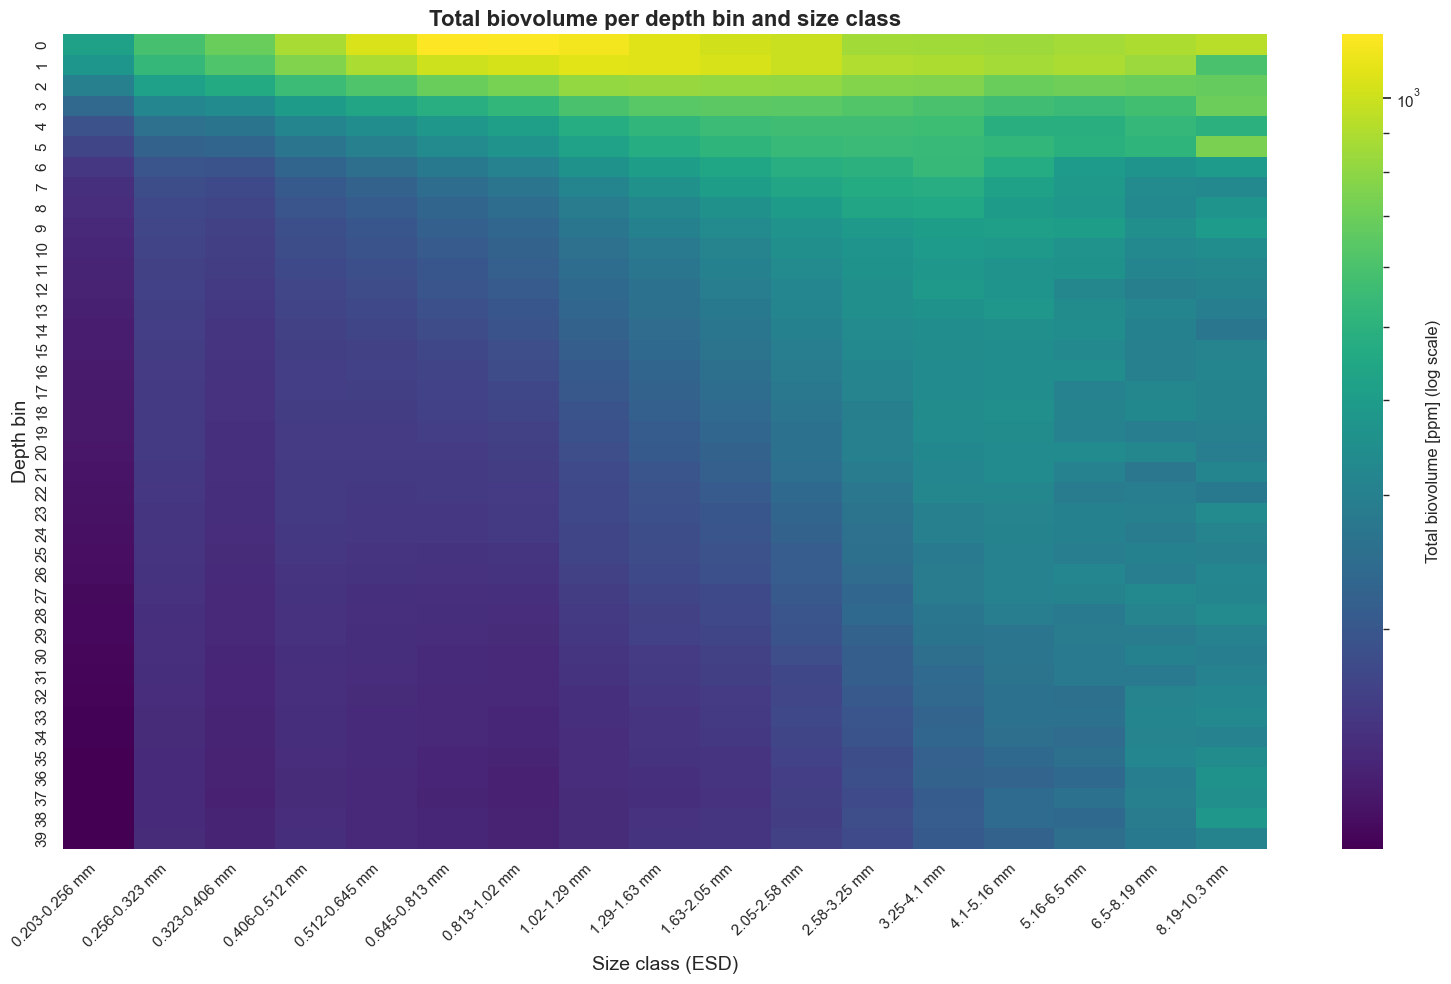

In [60]:

# --- 1. Extract biovolume columns ---
biovolume_cols = [c for c in BV_data.columns if "Biovolume [ppm]" in c]

# Extract clean ESD labels
size_labels = []
for col in biovolume_cols:
    m = re.search(r"\(ESD:\s*([^)]+)\)", col)
    size_labels.append(m.group(1) if m else col)

# --- 2. Build matrix: depth_bin × size_class ---
# We sum biovolume *within each depth bin* for each ESD class
heatmap_df = (
    BV_data
    .groupby("depth_bin")[biovolume_cols]
    .sum()                # sum biovolume per bin & size class
)

heatmap_df.columns = size_labels  # apply clean labels

# --- 3. Plot heatmap ---
plt.figure(figsize=(16, 10))
sns.set(style="white")

ax = sns.heatmap(
    heatmap_df,
    cmap="viridis",
    norm=plt.matplotlib.colors.LogNorm(),   # log colorscale (important!)
    cbar_kws={"label": "Total biovolume [ppm] (log scale)"},
)

ax.set_xlabel("Size class (ESD)", fontsize=14)
ax.set_ylabel("Depth bin", fontsize=14)
ax.set_title("Total biovolume per depth bin and size class", fontsize=16, fontweight="bold")

plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



### Outlier detection: Violinplots of biovolume per size class and depth bin


Result -->

Across all size classes and depth bins, the distributions exhibit pronounced positive skewness with persistent high-end outliers extending several orders of magnitude above the modal values. These outliers occur systematically—particularly in the upper depth bins—and form continuous heavy tails rather than isolated points, indicating that they reflect genuine ecological variability rather than measurement noise. Such extreme values are characteristic of particle and plankton size spectra, where sporadic large aggregates or organismal concentrations generate disproportionately high biovolume signals. Because a small number of extreme observations strongly inflates arithmetic statistics, the use of log-transformed data and geometric means provides a more appropriate and robust representation of central tendencies and variability within these inherently lognormal-like distributions.

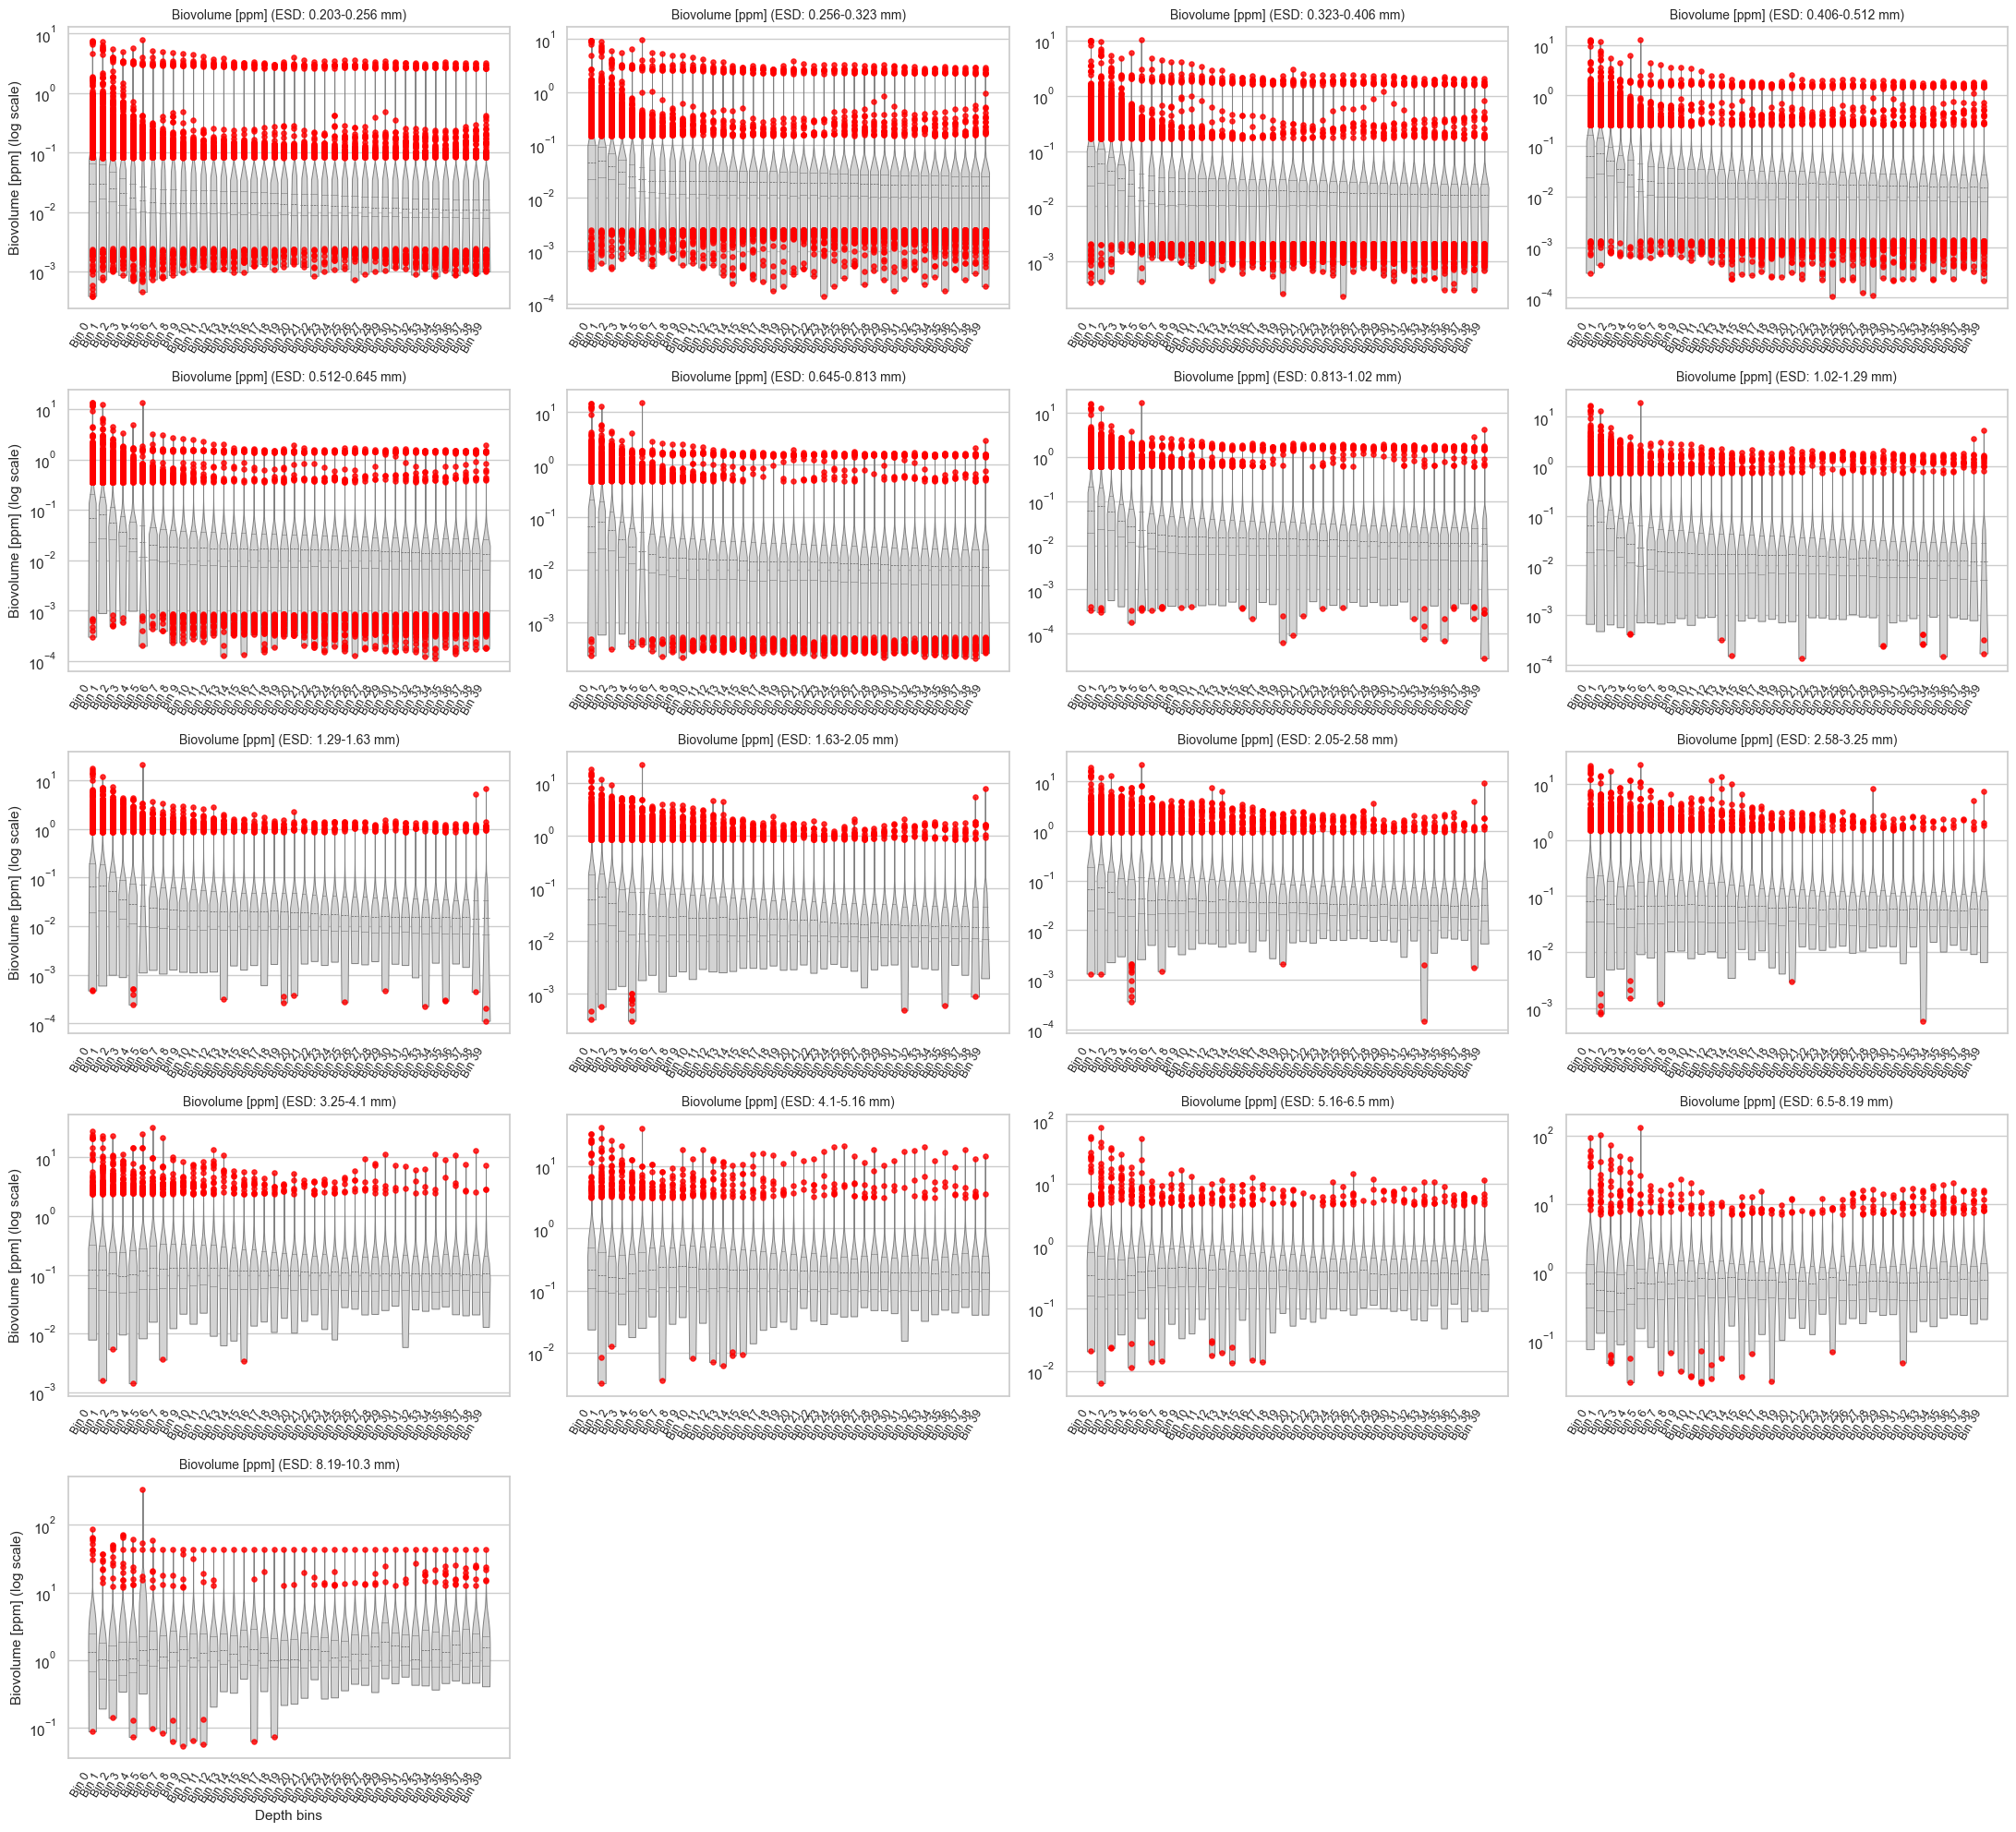

In [61]:
#Import necessary libraries
import math

# -----------------------------
# 1) Select biovolume columns
# -----------------------------
biovolume_cols = [c for c in BV_data.columns if "Biovolume [ppm]" in c]

# -----------------------------
# 2) Compute log-space outliers
# -----------------------------
bv = BV_data[biovolume_cols]
log_bv = np.log(bv.where(bv > 0))  

Q1 = log_bv.quantile(0.25)
Q3 = log_bv.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outlier_mask = (log_bv.lt(lower_bound)) | (log_bv.gt(upper_bound))

# -----------------------------
# 3) Multi-panel violin + outliers
# -----------------------------
n_cols = 4
n = len(biovolume_cols)
n_rows = math.ceil(n / n_cols)

sns.set(style="whitegrid")

fig = plt.figure(figsize=(22, 4 * n_rows))

for i, col in enumerate(biovolume_cols, start=1):
    ax = plt.subplot(n_rows, n_cols, i)

    temp = BV_data[[ "depth_bin", col ]].copy()
    temp = temp[temp[col] > 0]

    if temp.empty:
        ax.text(0.5, 0.5, "No positive values",
                ha='center', va='center', fontsize=10)
        ax.set_axis_off()
        continue

    temp["is_outlier"] = outlier_mask.loc[temp.index, col].fillna(False)

    # Clean grey violin
    sns.violinplot(
        data=temp,
        x="depth_bin",
        y=col,
        density_norm="width",
        inner="quartile",
        cut=0,
        linewidth=0.7,
        color="lightgrey",
        ax=ax,
    )

    #  Outliers highlighted
    out = temp[temp["is_outlier"]]
    if not out.empty:
        ax.scatter(
            out["depth_bin"],
            out[col],
            s=14,
            color="red",
            alpha=0.8,
            zorder=3
        )

    ax.set_yscale("log")

    # ---------------------------
    # 🔠 **Improved X-axis labels**
    # ---------------------------

    # Option A: shorten labels
    bins = sorted(temp["depth_bin"].unique())
    short_labels = [f"Bin {b}" for b in bins]
    ax.set_xticks(bins)
    ax.set_xticklabels(short_labels, rotation=60, ha="right", fontsize=9)

    # Title & axes
    ax.set_title(col, fontsize=10)

    if (i - 1) % n_cols != 0:
        ax.set_ylabel("")
    else:
        ax.set_ylabel("Biovolume [ppm] (log scale)", fontsize=11)

    if i <= (n_rows - 1) * n_cols:
        ax.set_xlabel("")
    else:
        ax.set_xlabel("Depth bins", fontsize=11)

plt.tight_layout()
plt.show()


### Distribution of target variables

Result --> 

Arithmetic mean appropriate for: ph, no3, po4, o2, fe, thetao_mean, so_mean, distance_to_coast_km, si
→ Skewness is small or moderate (|skew| < ~1–2), so linear scale is reasonable.

Geometric mean appropriate for: chl, phyc
→ Extremely right-skewed (skew > 5), strongly non-normal, strictly positive → log-scale fits much better.

Median vs. mean:
Some variables (e.g., si, distance_to_coast_km) show large gaps between mean and median → strong heterogeneity or long tails.

Overall:
Most environmental variables behave roughly symmetric enough for arithmetic means; only typical plankton-related variables (chl, phyc) show classic heavy-tailed patterns requiring geometric/log treatment.

In [62]:

from scipy.stats import shapiro, skew

sns.set(style="whitegrid")

# ================================================================
# 1) Select environmental variables (exclude coords & depth)
# ================================================================

vars_env = [
    "ph", "chl", "no3", "po4", "si", "o2", "fe",
    "phyc", "thetao_mean", "so_mean", "distance_to_coast_km"
]

env = env_data_subset[vars_env].copy()

# ================================================================
# 2) Statistical summary and dynamic "recommended mean" (labels only)
# ================================================================

results = []
for col in vars_env:
    x = env[col].dropna().values

    # Shapiro-Wilk (subsample to ≤ 5000)
    if len(x) > 5000:
        x_sample = np.random.choice(x, 5000, replace=False)
    else:
        x_sample = x

    try:
        shap_p = shapiro(x_sample).pvalue
    except:
        shap_p = np.nan

    # Skewness
    skewness_value = skew(x)

    # Decide on recommended mean TYPE (no numeric value) (2 as criterion is often used for enviromental data!)
    if abs(skewness_value) < 2:
        recommended_mean = "arithmetic"
    else:
        if np.all(x > 0):
            recommended_mean = "geometric"
        else:
            recommended_mean = "geometric (not applicable: non-positive values)"

    results.append({
        "variable": col,
        "arith_mean": np.mean(x),
        "median": np.median(x),
        "std": np.std(x, ddof=1),
        "skewness": skewness_value,
        "Shapiro_p": shap_p,
        "recommended_mean": recommended_mean
    })

# Convert to DataFrame
stats_df = pd.DataFrame(results)

print("\n=== Statistical Summary of Environmental Variables ===")
display(stats_df)




=== Statistical Summary of Environmental Variables ===


variable  arith_mean      median         std  skewness  \
0                     ph    7.881481    7.930155    0.170629 -0.651328   
1                    chl    0.040464    0.004715    0.099965  5.959153   
2                    no3   21.128569   21.341838   12.590296 -0.025388   
3                    po4    1.502695    1.589161    0.929800  0.098603   
4                     si   25.196140   14.429117   28.651345  1.905273   
5                     o2  161.681762  176.732818   81.063774 -0.256375   
6                     fe    0.000630    0.000666    0.000204  0.319222   
7                   phyc    0.158835    0.014781    0.411213  6.360926   
8            thetao_mean    9.895579    9.336625    5.654997  0.686784   
9                so_mean   35.610482   34.920269    1.576452  1.044759   
10  distance_to_coast_km  434.391169  264.908675  429.405519  1.727340   

       Shapiro_p recommended_mean  
0   1.296082e-48       arithmetic  
1   1.451120e-83        geometric  
2   2.862977e-39       arithmetic  
3   2.797215e-39       arithmetic  
4   1.250516e-65       arithmetic  
5   2.801183e-32       arithmetic  
6   6.328573e-59       arithmetic  
7   1.109757e-83        geometric  
8   3.436986e-34       arithmetic  
9   3.536950e-62       arithmetic  
10  3.989819e-60       arithmetic

### Mean and CI of Target Variables

Most variables show extremely tight 95% confidence intervals, meaning their mean estimates are very stable due to the large sample size (~224k). 

All arithmetic-mean variables display narrow, symmetric CIs in linear space, reflecting low relative uncertainty.

For chl and phyc, the CIs were computed in log-space, producing asymmetric intervals after back-transformation — appropriate for their strongly right-skewed distributions. These two variables show the largest relative CI width, indicating higher variability compared to the others.

=== Plot statistics (mean + CI used in figure) ===


mean      ci_low     ci_high   mean_type  \
ph                      7.881481    7.880775    7.882187  arithmetic   
no3                    21.128569    21.07649   21.180647  arithmetic   
po4                     1.502695    1.498849    1.506541  arithmetic   
o2                    161.681762  161.346449  162.017074  arithmetic   
thetao_mean             9.895579    9.872188    9.918971  arithmetic   
fe                       0.00063    0.000629    0.000631  arithmetic   
si                      25.19614   25.077627   25.314654  arithmetic   
so_mean                35.610482   35.603962   35.617003  arithmetic   
distance_to_coast_km  434.391169  432.614975  436.167364  arithmetic   
chl                     0.009039    0.008983    0.009095   geometric   
phyc                    0.033049    0.032848    0.033251   geometric   

                     log_scale       n                 ci_note  
ph                       False  224520  95% CI in linear space  
no3                      False  224520  95% CI in linear space  
po4                      False  224520  95% CI in linear space  
o2                       False  224520  95% CI in linear space  
thetao_mean              False  224520  95% CI in linear space  
fe                       False  224520  95% CI in linear space  
si                       False  224520  95% CI in linear space  
so_mean                  False  224520  95% CI in linear space  
distance_to_coast_km     False  224520  95% CI in linear space  
chl                       True  224520     95% CI in log-space  
phyc                      True  224520     95% CI in log-space

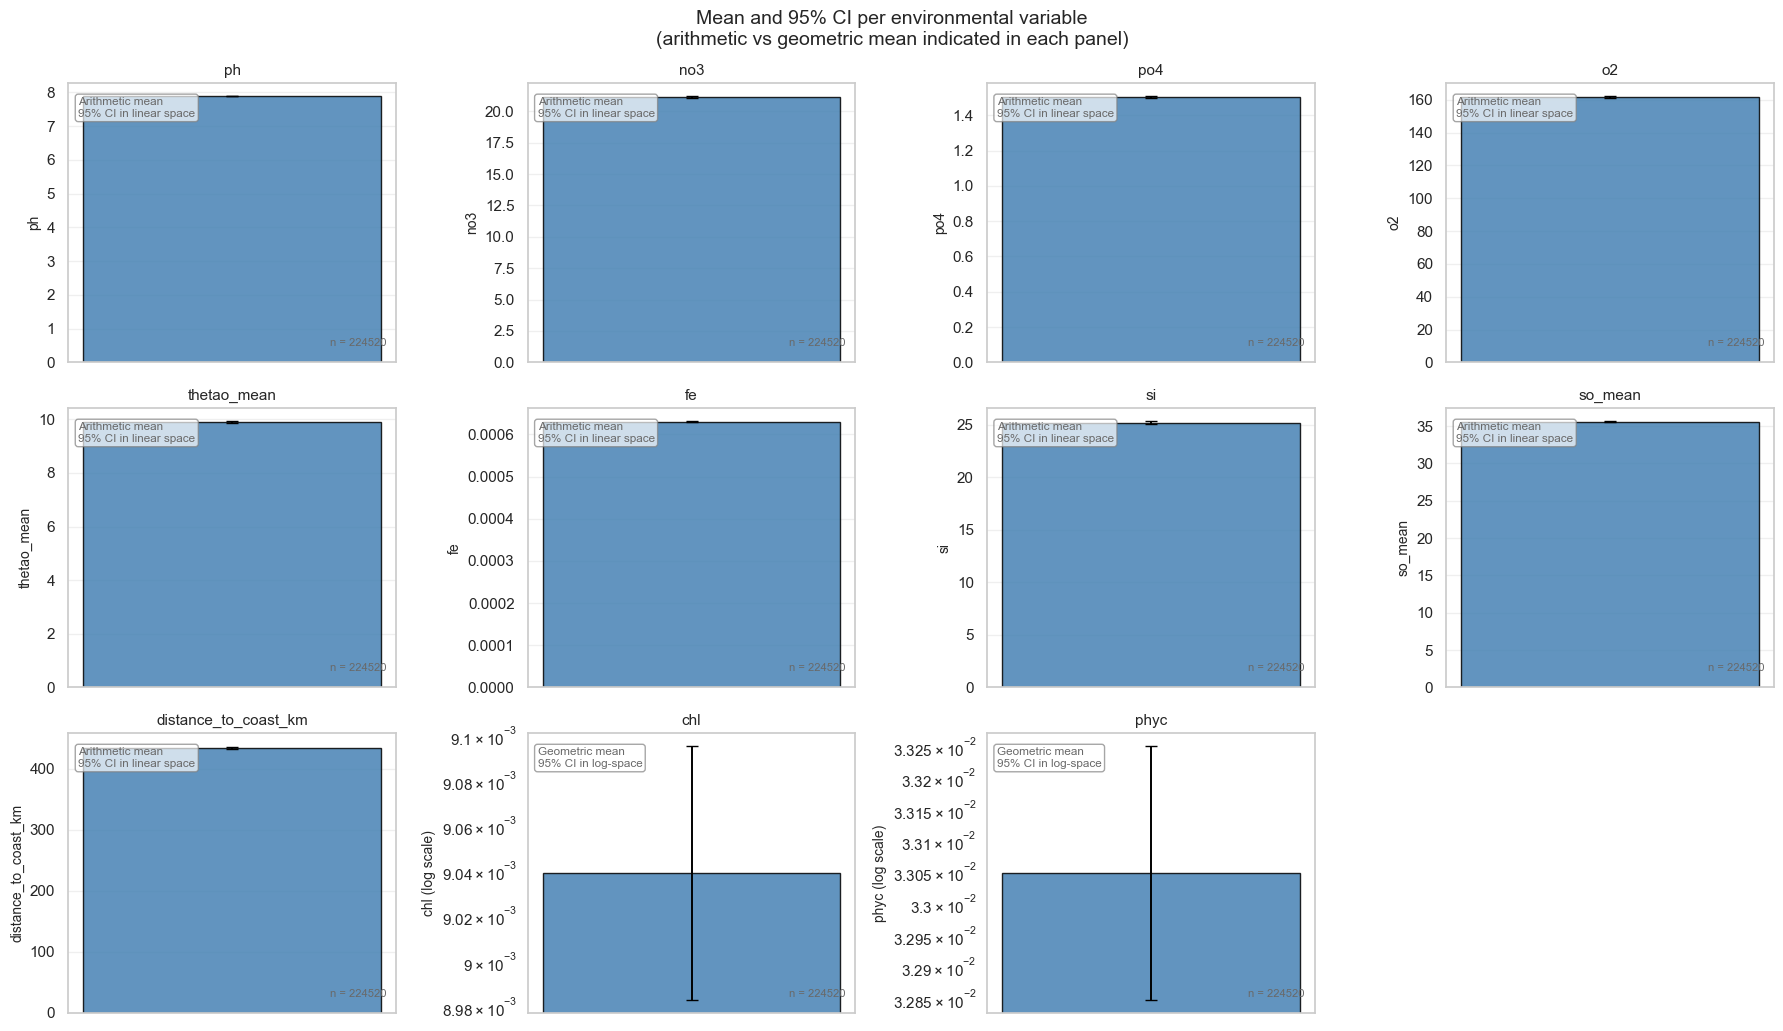

In [63]:
#import necessary libraries
from scipy.stats import t

sns.set(style="whitegrid")

# =========================================================
# 1) Define variables and split into arithmetic vs geometric
# =========================================================

# Variables for which an arithmetic mean is appropriate
arith_vars = ["ph", "no3", "po4", "o2", "thetao_mean", "fe", "si", "so_mean", "distance_to_coast_km"]

# Variables for which a geometric mean is more appropriate
geo_vars = ["chl", "phyc"]

all_vars = arith_vars + geo_vars
env = env_data_subset[all_vars].copy()

# =========================================================
# 2) Helper functions to compute means and 95% CIs
# =========================================================

def arithmetic_mean_ci(x):
    """Arithmetic mean and symmetric 95% CI in original space."""
    x = x[~np.isnan(x)]
    n = len(x)
    mean = x.mean()
    sd = x.std(ddof=1)
    t_crit = t.ppf(0.975, df=n-1)
    half_width = t_crit * sd / np.sqrt(n)
    return mean, mean - half_width, mean + half_width, n

def geometric_mean_ci(x):
    """Geometric mean and 95% CI computed in log-space and back-transformed."""
    x = x[x > 0]            # geometric mean requires strictly positive values
    log_x = np.log(x)
    n = len(log_x)
    mean_log = log_x.mean()
    sd_log = log_log = log_x.std(ddof=1)
    t_crit = t.ppf(0.975, df=n-1)
    half_width = t_crit * sd_log / np.sqrt(n)

    mean = np.exp(mean_log)
    low = np.exp(mean_log - half_width)
    high = np.exp(mean_log + half_width)
    return mean, low, high, n


# =========================================================
# 4) Compute mean + CI for plotting (arith vs geom)
# =========================================================

plot_stats = {}
for col in all_vars:
    x = env[col].dropna().values

    if col in geo_vars:
        mean, low, high, n = geometric_mean_ci(x)
        mean_type = "geometric"
        log_scale = True
        ci_note = "95% CI in log-space"
    else:
        mean, low, high, n = arithmetic_mean_ci(x)
        mean_type = "arithmetic"
        log_scale = False
        ci_note = "95% CI in linear space"

    plot_stats[col] = {
        "mean": mean,
        "ci_low": low,
        "ci_high": high,
        "mean_type": mean_type,
        "log_scale": log_scale,
        "n": n,
        "ci_note": ci_note
    }

plot_stats_df = pd.DataFrame(plot_stats).T
print("=== Plot statistics (mean + CI used in figure) ===")
display(plot_stats_df)

# =========================================================
# 5) Figure: bar charts with 95% CI, 4 subplots per row
# =========================================================

n_vars = len(all_vars)
n_cols = 4
n_rows = int(np.ceil(n_vars / n_cols))

fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4.5 * n_cols, 3.5 * n_rows),
    squeeze=False
)
axes = axes.flatten()

for ax, col in zip(axes, all_vars):
    s = plot_stats[col]
    mean = s["mean"]
    ci_low = s["ci_low"]
    ci_high = s["ci_high"]
    mean_type = s["mean_type"]
    log_scale = s["log_scale"]
    ci_note = s["ci_note"]

    # Narrow bar at x=0
    x_pos = 0
    width = 0.25  # narrower bar

    ax.bar(
        x_pos,
        mean,
        width=width,
        color="steelblue",
        edgecolor="black",
        alpha=0.85
    )

    # Asymmetric error bar
    yerr_lower = mean - ci_low
    yerr_upper = ci_high - mean

    ax.errorbar(
        x_pos,
        mean,
        yerr=[[yerr_lower], [yerr_upper]],
        fmt="none",
        ecolor="black",
        capsize=4,
        linewidth=1.4
    )

    # Log scale for geometric means
    if log_scale:
        ax.set_yscale("log")
        ylabel = f"{col} (log scale)"
    else:
        ylabel = col

    ax.set_ylabel(ylabel, fontsize=10)
    ax.set_xticks([])

    # Annotation box: mean type + CI info
    ax.text(
        0.03, 0.95,
        f"{mean_type.capitalize()} mean\n{ci_note}",
        transform=ax.transAxes,
        ha="left",
        va="top",
        fontsize=8.5,
        color="dimgray",
        bbox=dict(boxstyle="round,pad=0.25", fc="white", ec="gray", alpha=0.7)
    )

    # Sample size in lower-right corner
    ax.text(
        0.97, 0.05,
        f"n = {s['n']}",
        transform=ax.transAxes,
        ha="right",
        va="bottom",
        fontsize=8,
        color="dimgray"
    )

    ax.set_title(col, fontsize=11)
    ax.grid(axis="y", alpha=0.3)

# Hide any unused axes
for ax in axes[n_vars:]:
    ax.axis("off")

fig.suptitle(
    "Mean and 95% CI per environmental variable\n"
    "(arithmetic vs geometric mean indicated in each panel)",
    fontsize=14
)
plt.tight_layout()
plt.show()


### Detection of Outlier in Target Variables

Across most variables, the red points indicate a small number of extreme observations relative to the main data cloud. These outliers are most prominent in:

chl and phyc – extremely right-skewed, with many values close to zero and a long tail of high concentrations. Outliers here are expected and consistent with typical biological production spikes.

si, so_mean, and distance_to_coast_km – broader distributions with a few high-end extremes, likely representing specific environmental conditions (e.g., coastal vs. open ocean gradients).

fe – mostly tightly clustered but with a few isolated high values; common for trace metals with patchy inputs.

Other variables (ph, no3, po4, o2, thetao_mean) show few outliers, and the red points lie close to the main density, suggesting stable distributions without extreme deviations.

Overall, the violin plots confirm that only a few variables exhibit meaningful outlier-driven heterogeneity, mainly those with strong right skew (chl, phyc, si, distance_to_coast).

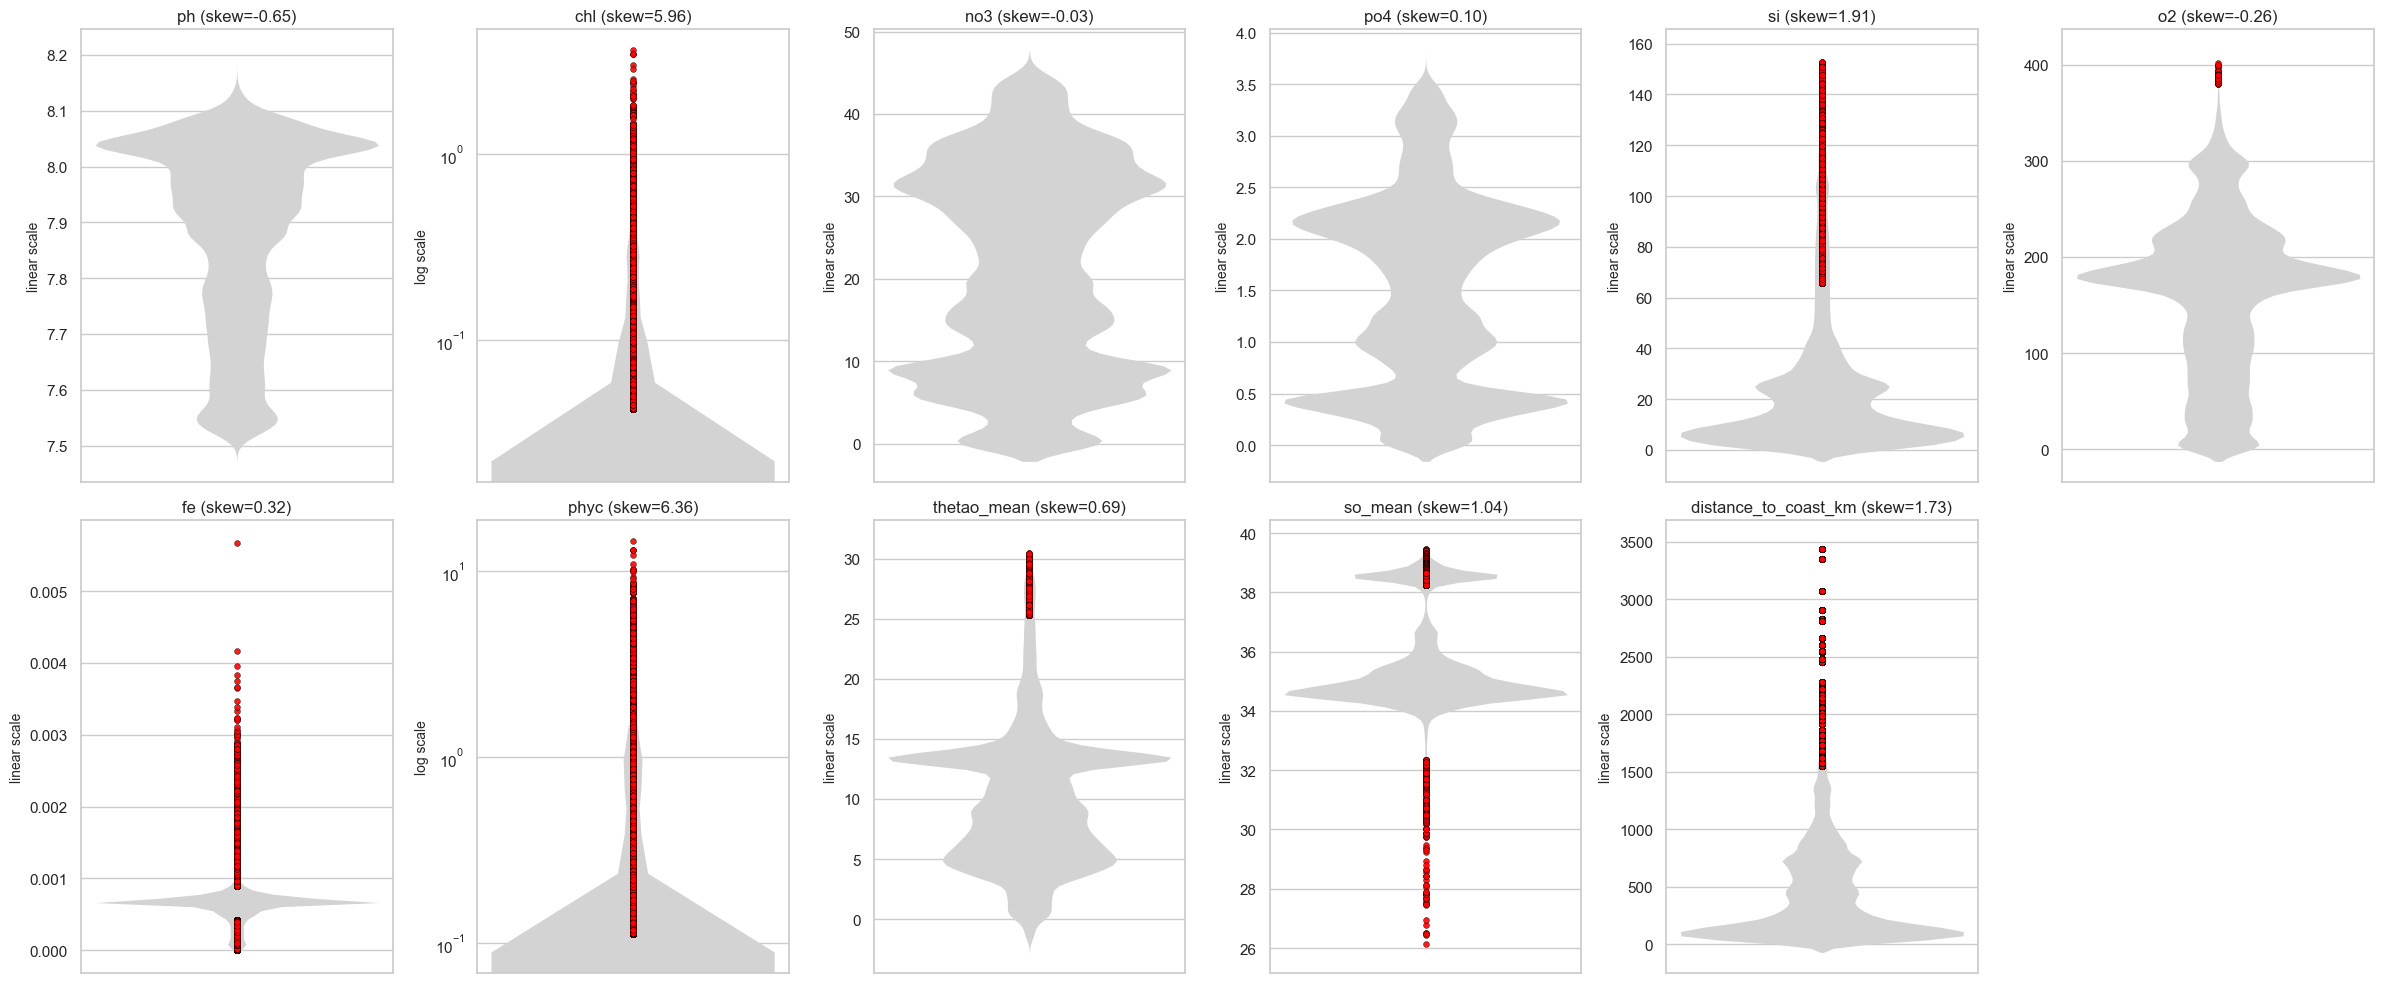

In [64]:
# ================================================================
# 1) Multi-subplot figure (2 rows, variables evenly distributed)
# ================================================================

n_cols = int(np.ceil(len(vars_env) / 2))
n_rows = 2

fig, axes = plt.subplots(
    nrows=n_rows,
    ncols=n_cols,
    figsize=(4 * n_cols, 10),
    squeeze=False
)
axes = axes.flatten()

# ================================================================
# 2) Plot each variable
# ================================================================

for ax, col in zip(axes, vars_env):
    x = env[col].dropna()

    # Outlier detection (IQR)
    Q1, Q3 = np.percentile(x, [25, 75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    outliers = x[(x < lower) | (x > upper)]

    # Log-scale decision
    sk_val = skew(x)
    use_log = (sk_val > 2) and (x > 0).all()

    # Violin
    sns.violinplot(
        y=x,
        orient="v",
        color="lightgray",
        inner=None,
        linewidth=0,
        ax=ax
    )

    # Outliers
    ax.scatter(
        np.zeros(len(outliers)),
        outliers,
        color="red",
        s=18,
        edgecolor="black",
        linewidth=0.3,
        alpha=0.9
    )

    # Axis settings
    if use_log:
        ax.set_yscale("log")
        ax.set_ylabel("log scale", fontsize=10)
    else:
        ax.set_ylabel("linear scale", fontsize=10)

    ax.set_xticks([])      # no x ticks
    ax.set_xlabel("")      # no x label

    # Title: variable + skewness
    ax.set_title(f"{col} (skew={sk_val:.2f})", fontsize=12)

# Hide unused axes
for ax in axes[len(vars_env):]:
    ax.axis("off")

plt.tight_layout()
plt.show()


## Possible Biases

[Investigate the dataset for any biases that could affect the model’s performance and fairness (e.g., class imbalance, historical biases).]


In [65]:
# Example: Checking for class imbalance in a classification problem
# sns.countplot(x='target_variable', data=df)

# Your code to investigate possible biases goes here


### Target Class Biases

There are **10 classes** in total, each cluster corresponds to one of these target classes.  
We observe an imbalanced distribution of measurements across the respective classes.

**The table below shows**;
The class counts in this subset range from **10,360** to **42,880**, which appears rather substantial.

<Axes: xlabel='cluster', ylabel='count'>

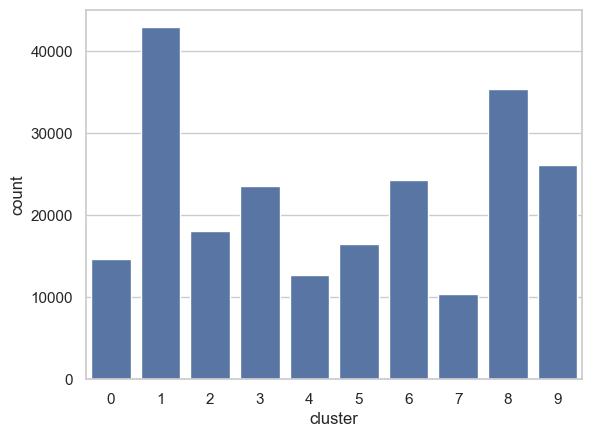

In [66]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE   :   Counts of cluster mappings across the subset of environment measurements.           #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

cluster_merge_subset = env_data_subset.merge(cluster_mapping, on='Profile_id')
cluster_merge_subset.head()
sns.countplot(x='cluster', data=cluster_merge_subset)

In [67]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE   :   List of cluster counts across the subset of environment measurements.               #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
class_occurances = cluster_merge_subset['cluster'].value_counts()
class_df = class_occurances.to_frame(name='count').reset_index()
class_df

cluster  count
0        1  42880
1        8  35320
2        9  26160
3        6  24240
4        3  23600
5        2  18080
6        5  16440
7        0  14680
8        4  12760
9        7  10360

### Target Variable Biases

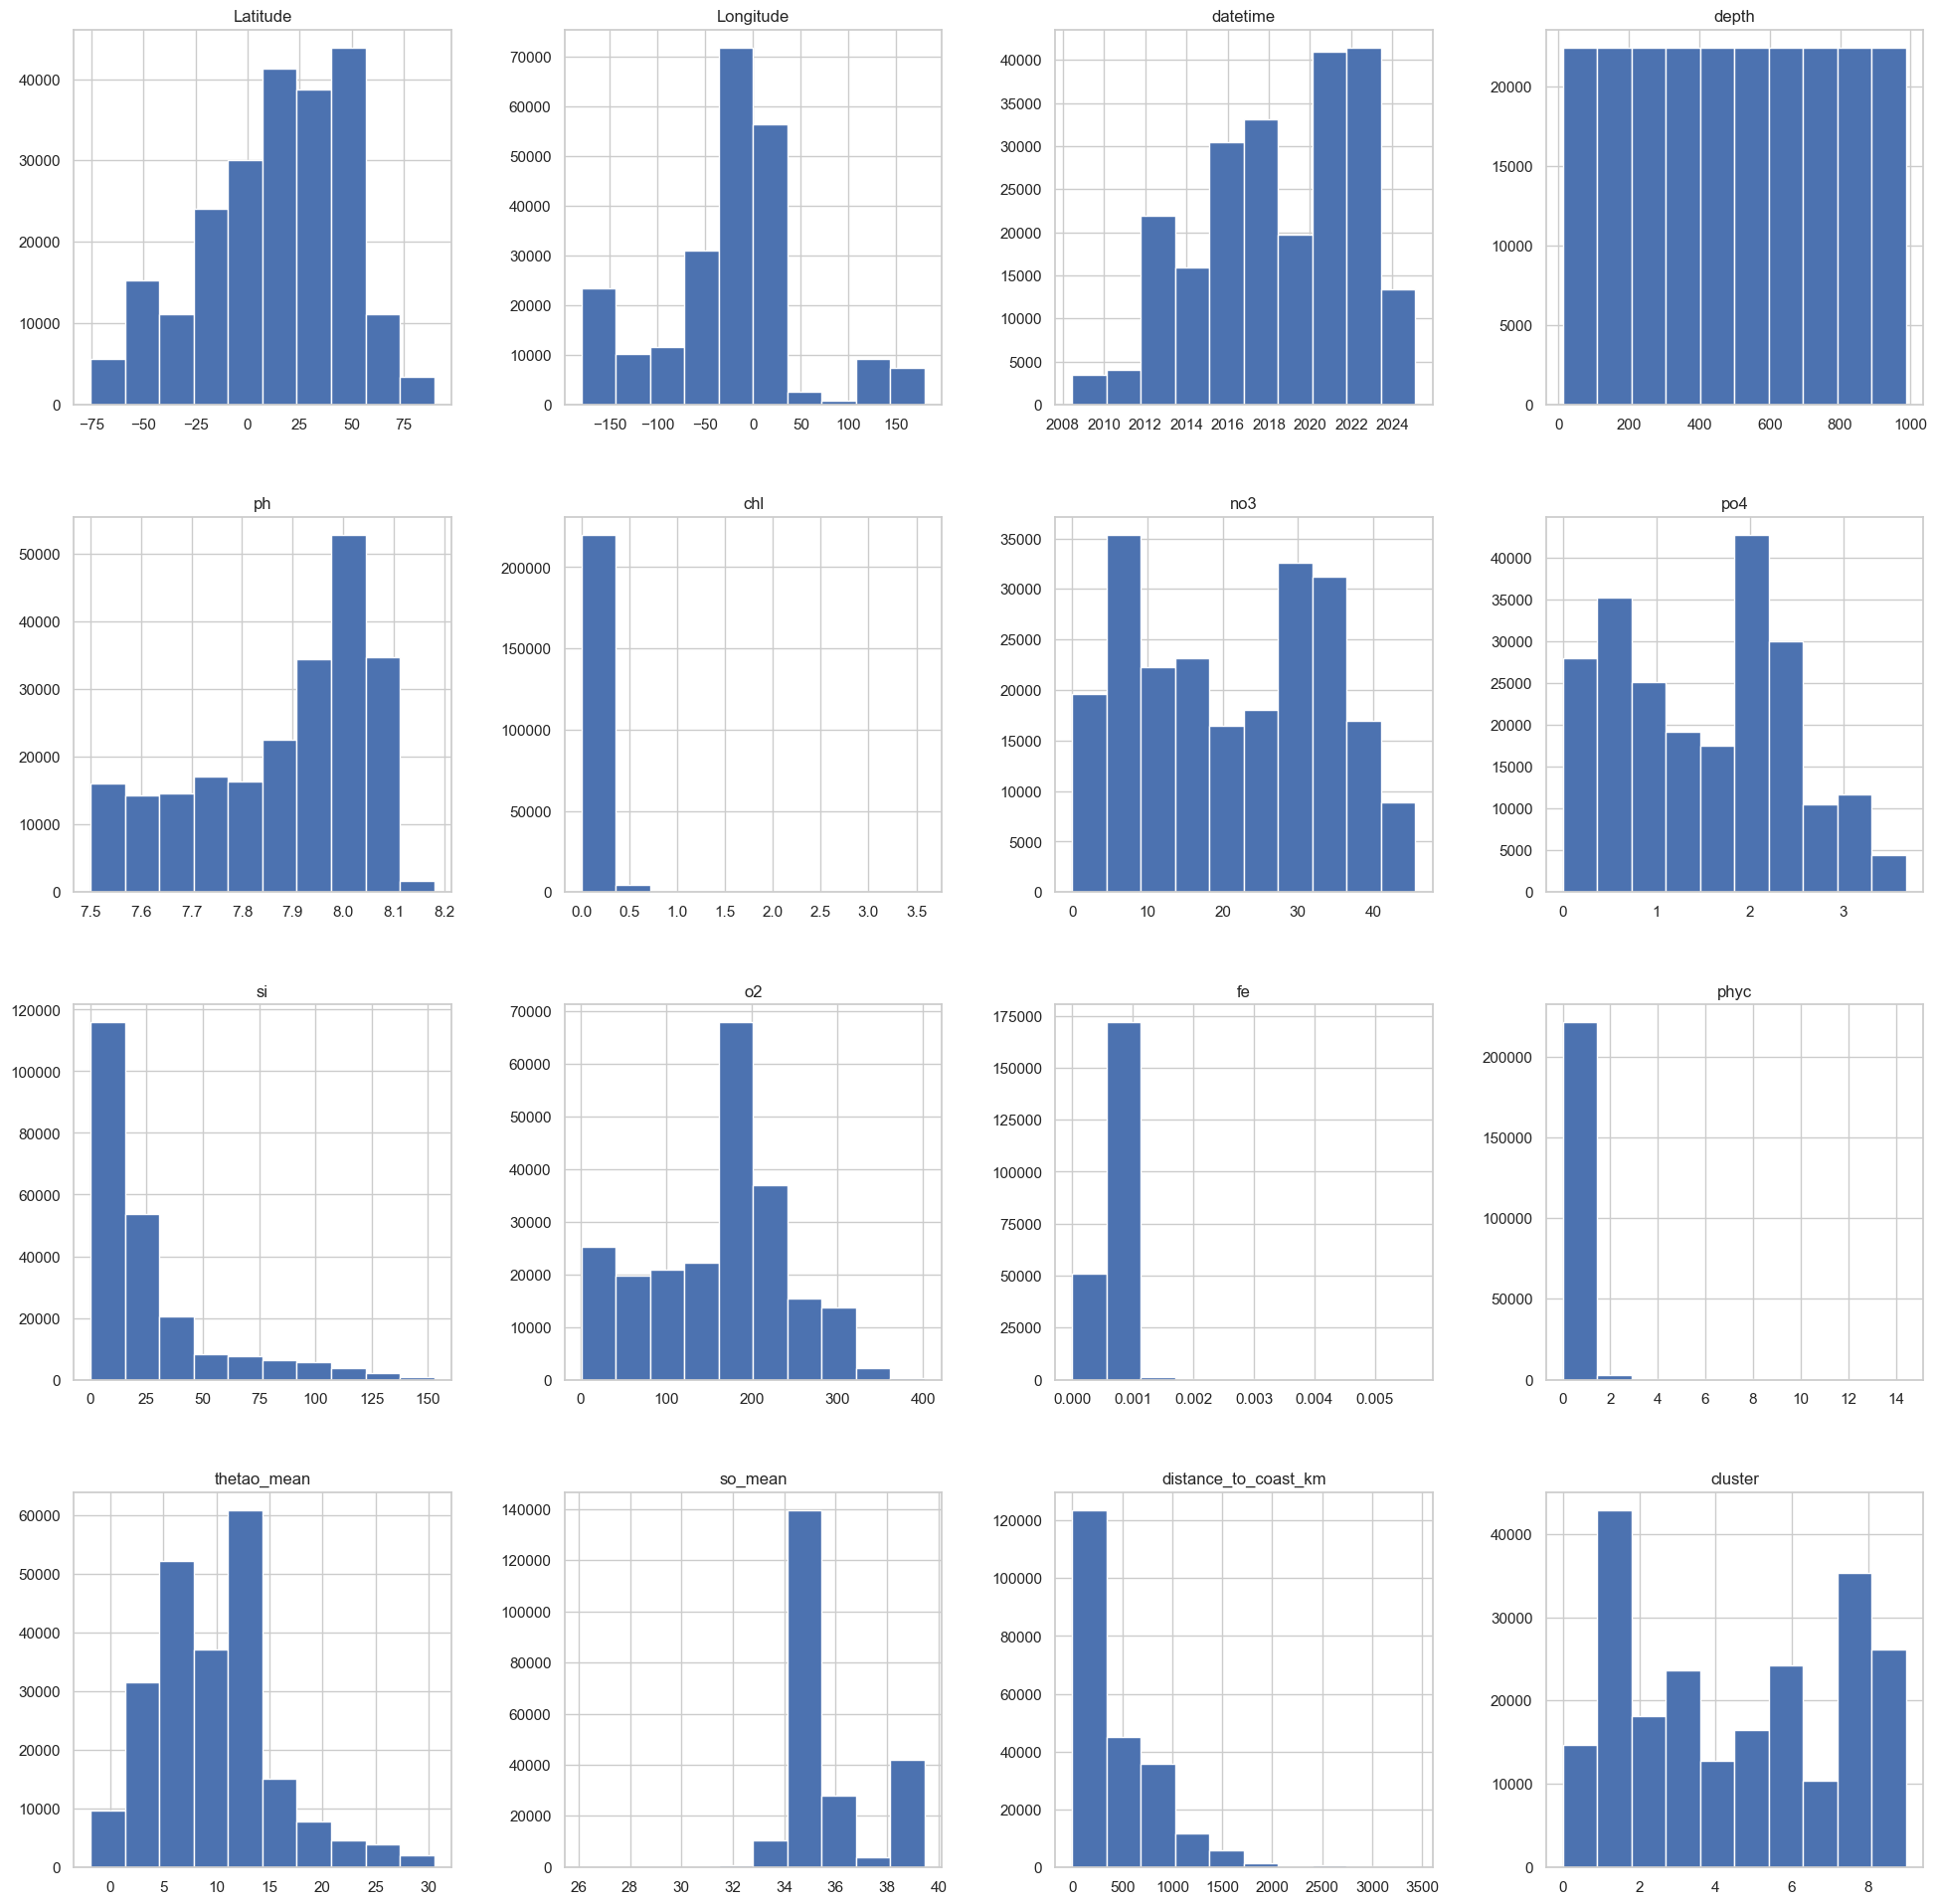

In [68]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#                   EXPLORE   :   Individual target variables and their distribution.                     #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

cluster_merge_subset.hist(figsize=(24, 24))
plt.show()

### Time-series evaluation of biases in sampling time and geographic dispersion.

#### Number of samples per year and month

This heatmap shows how sampling effort and model coverage vary across time. Darker cells represent months with a high number of available data points (either measured or modeled), while lighter areas indicate sparse or missing coverage. The plot highlights strong temporal heterogeneity: intensive coverage appears especially in 2021–2022, whereas earlier years and winter months contain far fewer data points.

<Axes: xlabel='month', ylabel='year'>

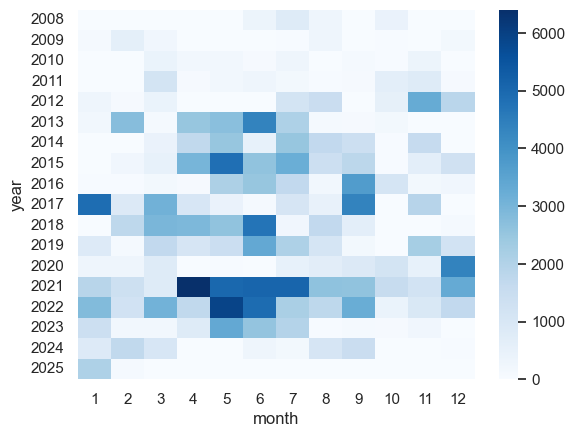

In [69]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       Explore :    Imbalances in measurement dates across study years.                                  #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
cluster_merge_subset['year'] = cluster_merge_subset['datetime'].dt.year
cluster_merge_subset['month'] = cluster_merge_subset['datetime'].dt.month

heat = cluster_merge_subset.groupby(['year', 'month']).size().unstack(fill_value=0)
sns.heatmap(heat, cmap='Blues')

In [70]:
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###
#       EXPLORE :   Geographic distribution and site imbalance of sample records.                         #
### ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ~ ###

df_merge = cluster_merge_subset.copy()
df_merge['year'] = df_merge['datetime'].dt.year
df_merge['month'] = df_merge['datetime'].dt.month

#### Latitudinal vs. longitudinal standard deviation

**These two heatmaps illustrate how spatially dispersed the samples were in each month and year.**

- The latitudinal standard deviation reflects how spread out the sampling was in the North–South direction. Higher values indicate that samples came from widely separated latitudes, suggesting sampling across multiple basins or depth gradients.

- The longitudinal standard deviation measures spatial spread in the East–West direction. High values here indicate sampling across geographically distant regions, often spanning different oceanic or coastal areas.

**Comparing the two plots**:
You can see that certain periods exhibit stronger dispersion in latitude (e.g., 2018, 2020–2023), while others show greater dispersion in longitude (e.g., 2014, 2021–2023). This difference suggests shifts in sampling strategy or geographic focus. For example, months with high latitudinal but low longitudinal variation likely represent north–south transects, while the opposite pattern indicates east–west sampling campaigns. Together, the plots highlight how spatial sampling bias varies over time and direction.

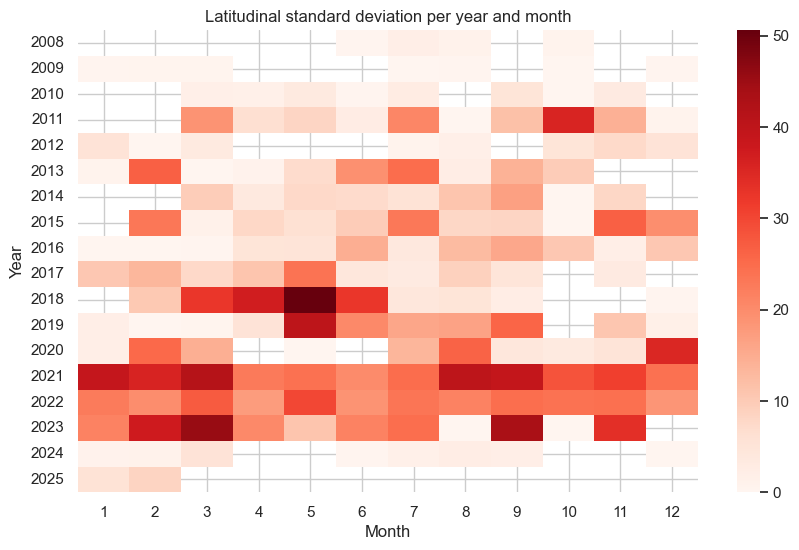

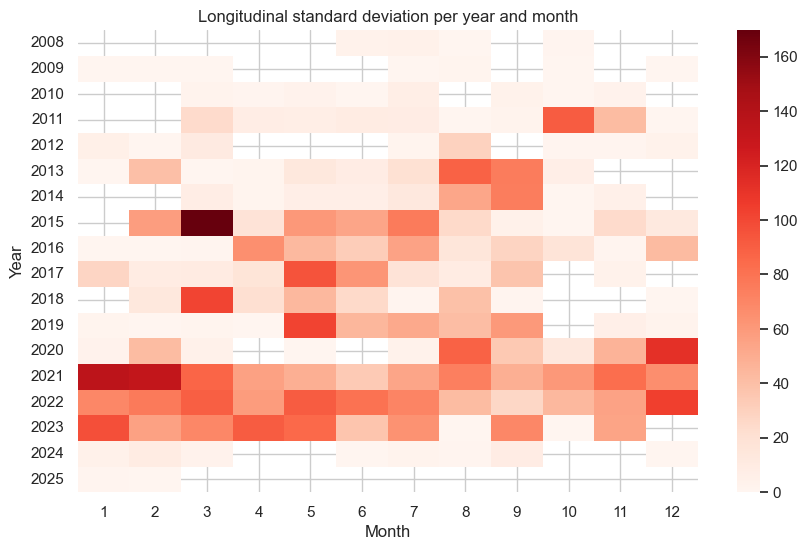

In [71]:
lat_stats = (
    df_merge
    .groupby(['year', 'month'])['Latitude']
    .agg(['min', 'max', 'std'])
)
lon_stats = (
    df_merge
    .groupby(['year', 'month'])['Longitude']
    .agg(['min', 'max', 'std'])
)

lat_range = (lat_stats['max'] - lat_stats['min']).unstack(fill_value=0)
lon_range = (lon_stats['max'] - lon_stats['min']).unstack(fill_value=0)

lat_std = lat_stats['std'].unstack()
lon_std = lon_stats['std'].unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(lat_std, cmap='Reds')
plt.title('Latitudinal standard deviation per year and month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(lon_std, cmap='Reds')
plt.title('Longitudinal standard deviation per year and month')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()

## Correlations

[Explore correlations between features and the target variable, as well as among features themselves.]


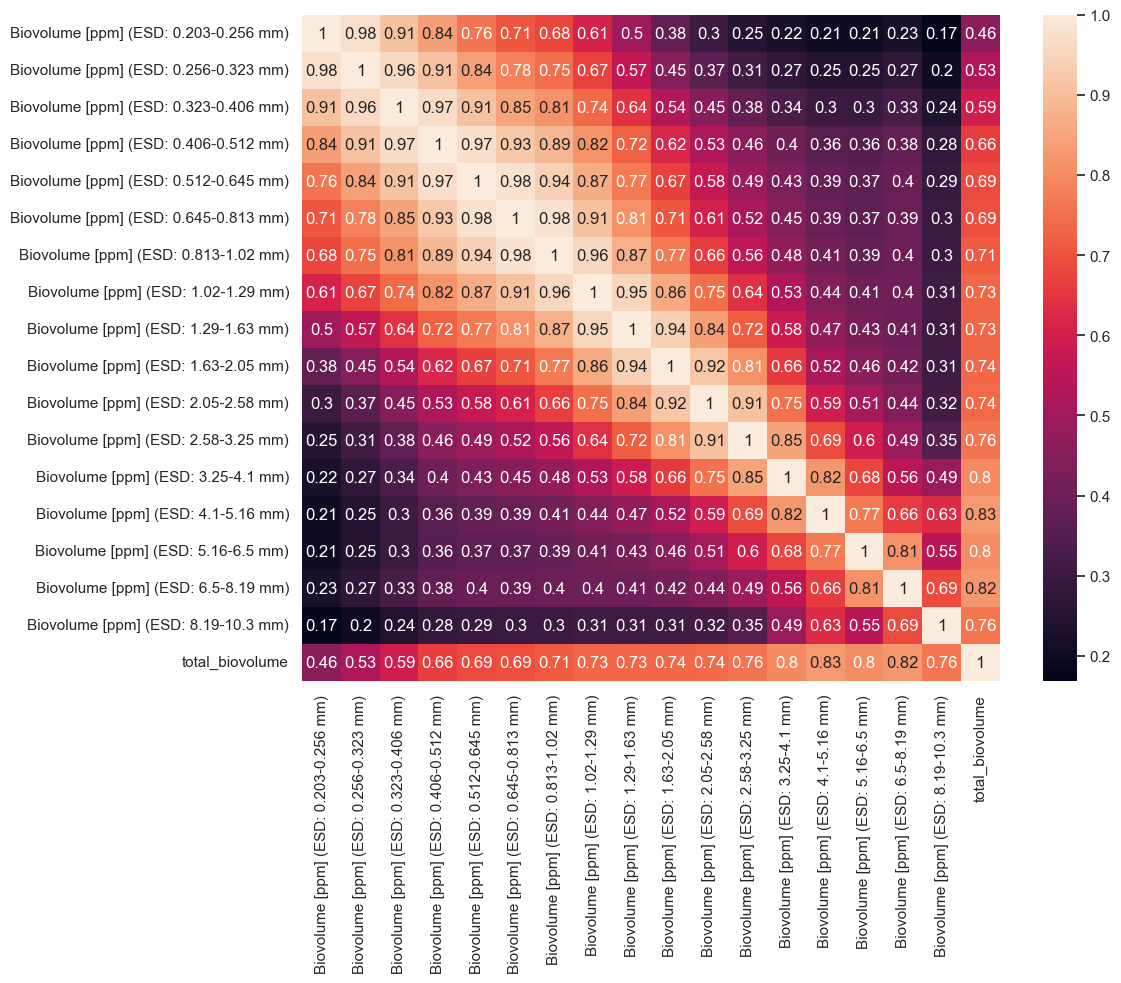

In [72]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(12, 10))
df = BV_data #Create a dataframe that only contains numerical values
df = df.drop(columns=['Profile_id', "depth", "depth_bin"]) 
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# --> The Biovolume of sizeclasses that are closely related have a high correlation, but the biovolume of very small and very large particle sizes is only poorly correlated
# --> All values are positievly correlated. There is no negative correlation


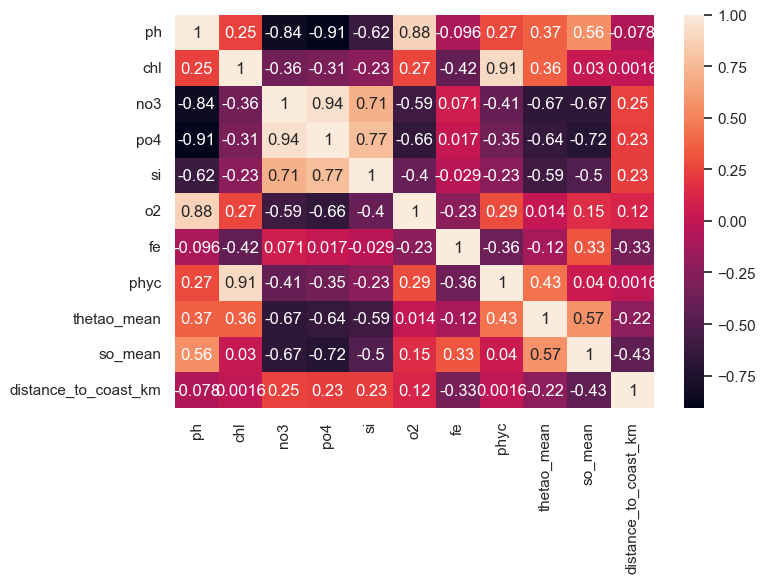

In [73]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(8, 6))
df2 = env_data_subset #Create a dataframe that only contains numerical values
df2 = df2.drop(columns=["Profile_id", "Latitude", "Longitude", "datetime", "depth", "MarineRegion"]) 
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# In the target values there is high correlation (>0.7) between:
# ph & o2; chl & phyc; po4 & no3; si & no3; si & po4
# There is high anticorrelation (<-0.7) between:
# ph & no3; ph & po4; po4 & so_mean; 


In [74]:
# merge datasets due to their profile Id and their depth to see whether there are any correlations between biovolume (feature data) and environmental data (target data)
merged_df = pd.merge(
    BV_data, env_data_subset, 
    on=['Profile_id', 'depth'],  # Schlüsselspalten
    how='left'                   # 'left', 'right', 'inner' oder 'outer'
)
#merged_df.head()
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224520 entries, 0 to 224519
Data columns (total 36 columns):
 #   Column                                 Non-Null Count   Dtype         
---  ------                                 --------------   -----         
 0   Profile_id                             224520 non-null  object        
 1   depth                                  224520 non-null  float64       
 2   depth_bin                              224520 non-null  int64         
 3   Biovolume [ppm] (ESD: 0.203-0.256 mm)  224520 non-null  float64       
 4   Biovolume [ppm] (ESD: 0.256-0.323 mm)  224520 non-null  float64       
 5   Biovolume [ppm] (ESD: 0.323-0.406 mm)  224520 non-null  float64       
 6   Biovolume [ppm] (ESD: 0.406-0.512 mm)  224520 non-null  float64       
 7   Biovolume [ppm] (ESD: 0.512-0.645 mm)  224520 non-null  float64       
 8   Biovolume [ppm] (ESD: 0.645-0.813 mm)  224520 non-null  float64       
 9   Biovolume [ppm] (ESD: 0.813-1.02 mm)   224520 no

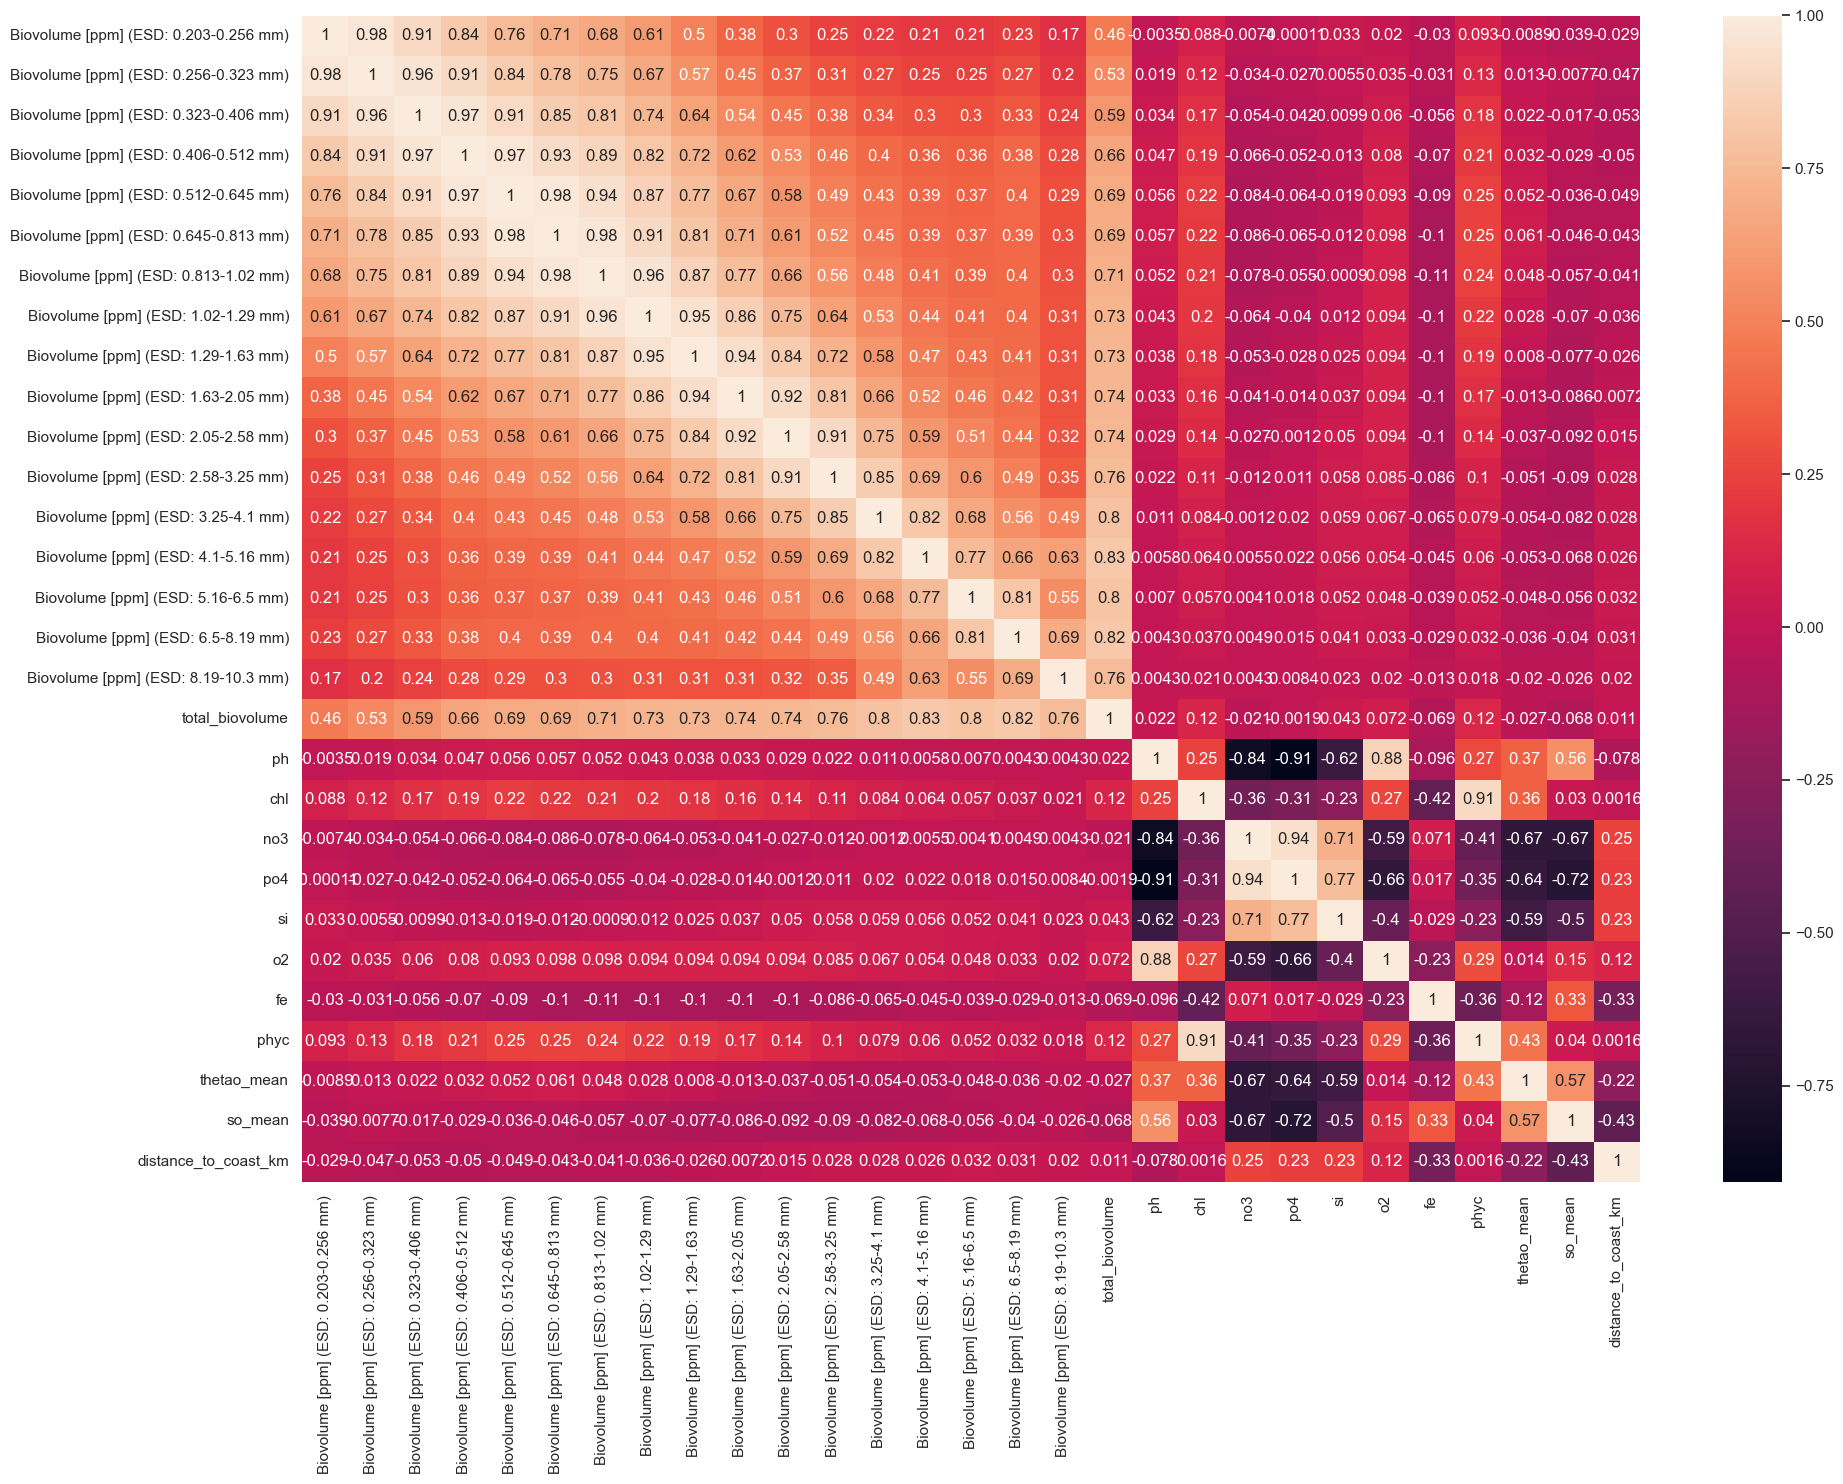

In [75]:
# Example: Plotting a heatmap to show feature correlations
plt.figure(figsize=(20, 15))
merged_df = merged_df.drop(columns=['Profile_id', "depth", "depth_bin", "Latitude", "Longitude", "datetime", "MarineRegion"]) 
correlation_matrix = merged_df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.tight_layout()
plt.show()
# --> No real correlation between Biovolume (feature data) and environmental data (target data)


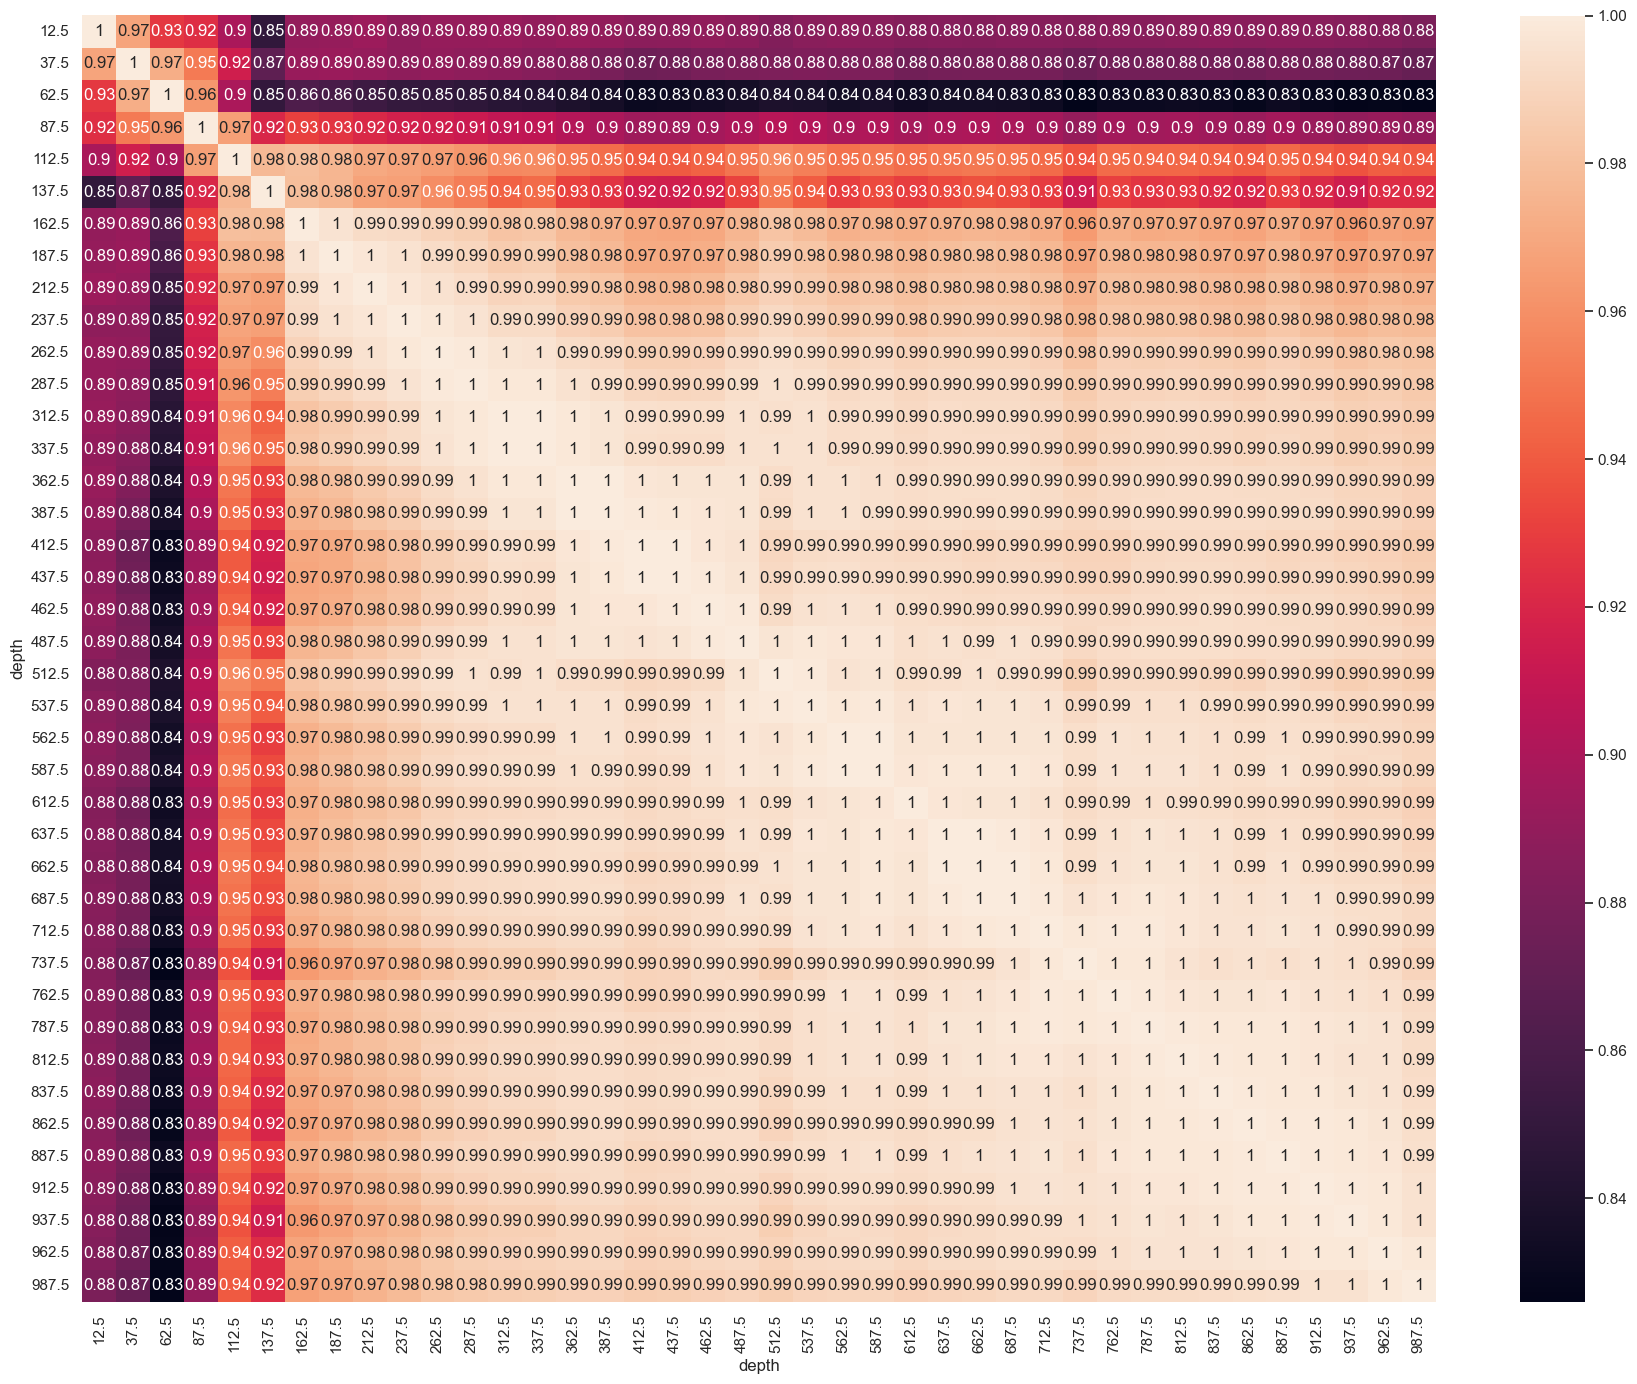

In [76]:
# Determine how biovolume values in each depth layer correlate with the biovolume data of the other depth layers
biovolume_cols = [col for col in BV_data.columns if 'Biovolume' in col]

plt.figure(figsize=(18, 14))
# Pivotieren: Profile_id bleibt Index, depth wird zu Spalten
df_pivot = BV_data.pivot(index='Profile_id', columns='depth', values=biovolume_cols[0])
corr_depths = df_pivot.corr()  
sns.heatmap(corr_depths, annot=True)
plt.tight_layout()
plt.show()
# --> The results show that there is a very high correlation between depth. Has one biovolume class a high value in 12.5m it also has a high value in 100m, etc. 